# **House flipping Assignment**
## *Upgrad project 3*
### project by **Géraldine Bengsch**

# Aims of the project
This project aims to explore bike sharing data set and build a regularised regression model based on initial EDA.
This notebook demonstrates my thought process and shows the reader the steps taken and the insights gathered from the data. It documents my process of becoming familiar with the data, initial exploration, initial insights and more complex visualisations. The analysis is thus conducted in stages, individual sections can be found in the table of contents (*note: TOC works in Jupyter notebook, not in github*).
The notebook begins by explaining the business problem that is addressed. It then moves to data understanding and data cleaning. The majority of the notebook is comprised of data analysis, corresponding visualisations and the building of a regression model and the regularisation of the data. Insights from the analysis are presented below the respective graphs. The notebook concludes with insights of the analysis.
The notebook relies on `train.csv` found in the project for the analysis

## Table of Contents
* [0. Business Problem](#0-business-problem)
    * [0.1 Boom Bikes](#0-boom-bikes)
* [1. Data Understanding](#1-data-understanding)
* [2. Data Cleaning](#2-data-cleaning)
    * [2.1 Missing values](#21-missing-values)
    * [2.2 Outlier detection](#22-outlier-detection)
* [3. Exploratory Data Analysis](#3-exploratory-data-analysis)
    * [3.2 Identifying correlations](#34-identifying-correlations)
    * [3.3 Dropping unneccessary columns](#33-dropping-unneccessary-columns)
* [4. Data preparation](#4-data-preparation)
* [4.1 Creating dummy variables](#41-creating-dummy-variables)
* [4.2 Scaling Data](#42-scaling-data)
    * [4.3 Splitting the data into training and testing sets](#43-splitting-the-data-into-training-and-testing-sets)
* [5. Feature Engineering](#5-feature-engineering)
    * [5.1 Linear Model](#51-linear-model)
    * [5.2 Ridge and Lasso Regression](#52-rigde-and-lasso-regression)
        * [5.2.1 Ridge Regression](#521-ridge-regression)
        * [5.2.2 Lasso Regression](#522-lasso-regression)
 * [5.3 Predictions and Normality of Residuals](#53-predictions-and-normality-of-residuals)
* [5.4 Changes in Coefficients](#54-changes-in-coefficients)
    * [5.5 Evaluation of the model](#55-evaluation-of-the-model)
* [6. Alternate Approach](#6-alternate-approach)
* [6.1 Recursive feature elimination](#61-recursive-feature-elimination)
    * [6.2 Checking VIF and rebuilding model](#62-checking-vif-and-rebuilding-model)
     * [6.3 Ridge Regression with RFE](#63-ridge-regression-with-rfe)
* [7. Subjective Questions](#7-subjective-questions)

# 0. Business Problem

 A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The aim is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 0.1 Sunrise Housing-House flipping

Flipping (also called wholesale real estate investing) is a type of real estate investment strategy in which an investor purchases a property not to use, but with the intention of selling it for a profit.

Investors who flip properties concentrate on the purchase and subsequent resale of one property, or a group of properties. Many investors attempt to generate a steady flow of income by engaging in frequent flips.

# 1. Data Understanding

The first phase of the project consisted of becoming familiar with the data set. I imported the necessary libraries, read in the data set from the provided file into a data frame, and inspected it.

In [336]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV



# print library versions
print("\n")
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("sklearn: ",sklearn.__version__)
print("statsmodels: ",statsmodels.__version__)
print("scipy: ",scipy.__version__)



python:  3.10.0
numpy:  1.22.1
pandas:  1.4.0
matplotlib:  3.5.1
seaborn:  0.11.2
sklearn:  1.0.2
statsmodels:  0.13.1
scipy:  1.8.0


In [337]:
#increase font size of all elements of seaborn fonts to make reading easier
sns.set(font_scale=1.5)
# see the data with all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',500)
pd.set_option('display.width', 1000)

In [338]:
# read data into a first data frame
house = pd.read_csv('train.csv')

In [339]:
# display first five rows
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [340]:
#display basic statistical information for the data
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [341]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Here are basic statistical insights.  The standard deviation of quality variables is low, suggesting that the data is clustered around the mean. Other variables appear to have more spread out data. This is also the case for the dependant variable, the sales price. The data may not be normally distributed. This will be determined and addressed in the following section.

In [342]:
# check how many entries there are in the dataset 
house.shape

(1460, 81)

The data set consists of 1460 rows and 81 columns. It contains categorical and continuous variables that describe different types of data the company collects for its business. Not all of the columns will be useful for the analysis. EDA will be used to discover which data will be useful to build the regression model.

# 2. Data Cleaning
## 2.1 Missing values
The data set was analysed for missing values. There are various columns that have missing values. In this section, I will address the missing values and decide based on business logic, and also on the amount of data that is available. 

In [343]:
# check if any missing values are present in the data
house.isnull().sum().sum()

6965

In [344]:
# display the column names that have missing values
house.columns[house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [345]:
# check the amount of missing values in the columns
columns_nan =  house.columns[house.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [346]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

Null values in %
Feature names                  
PoolQC                    99.52
MiscFeature               96.30
Alley                     93.77
Fence                     80.75
FireplaceQu               47.26
LotFrontage               17.74
GarageYrBlt                5.55
GarageCond                 5.55
GarageType                 5.55
GarageFinish               5.55

***
### Insight into missing values
There are five columns that have considerable data values missing. The decision was made to drop these columns. Pool, Fence and Fireplace are all features that could be added to or removed from an existing property should it be desired. As such, the missing data may be considered a reflection of business practices, e.g. that it is not particularly valuable data to collect. Miscallaneous features encompass too many potential features that could be included in this group. As such, imputing a value does not appear to provide any useful information, both on a business and a model level.
Alleys may appeal to some customers, but not others. While there are some pros, such as easy access to the garage and garbage collection, there are also negatives, such as having people traverse the public alley constantly, potential for crime, theft or vandalism, people blocking the alleyways with their vehicles, etc. This can lead to financial loss. While it might appeal to some buyers who seek something different, it does not seem to fit well with the aims of the house flipping business. As such, the feature will not be included in the model.

(compare https://toughnickel.com/real-estate/Buying-a-House-With-an-Alleyway)
***

In [347]:
#dropping all columns with 45% and more missing values
for col in columns_nan:
    if house[col].isnull().sum()*100/house.shape[0]>45:
        house.drop(col,1, inplace=True)

C:\Users\geral\AppData\Local\Temp\ipykernel_3484\680606664.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  house.drop(col,1, inplace=True)
C:\Users\geral\AppData\Local\Temp\ipykernel_3484\680606664.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  house.drop(col,1, inplace=True)
C:\Users\geral\AppData\Local\Temp\ipykernel_3484\680606664.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  house.drop(col,1, inplace=True)
C:\Users\geral\AppData\Local\Temp\ipykernel_3484\680606664.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  house.drop(col,1, inplace=True)
C:\Users\geral\AppData\Local\Temp\ipykernel_3484\680606664.py:4: FutureWarni

In [348]:
house.shape

(1460, 76)

The five columns discussed above have been dropped

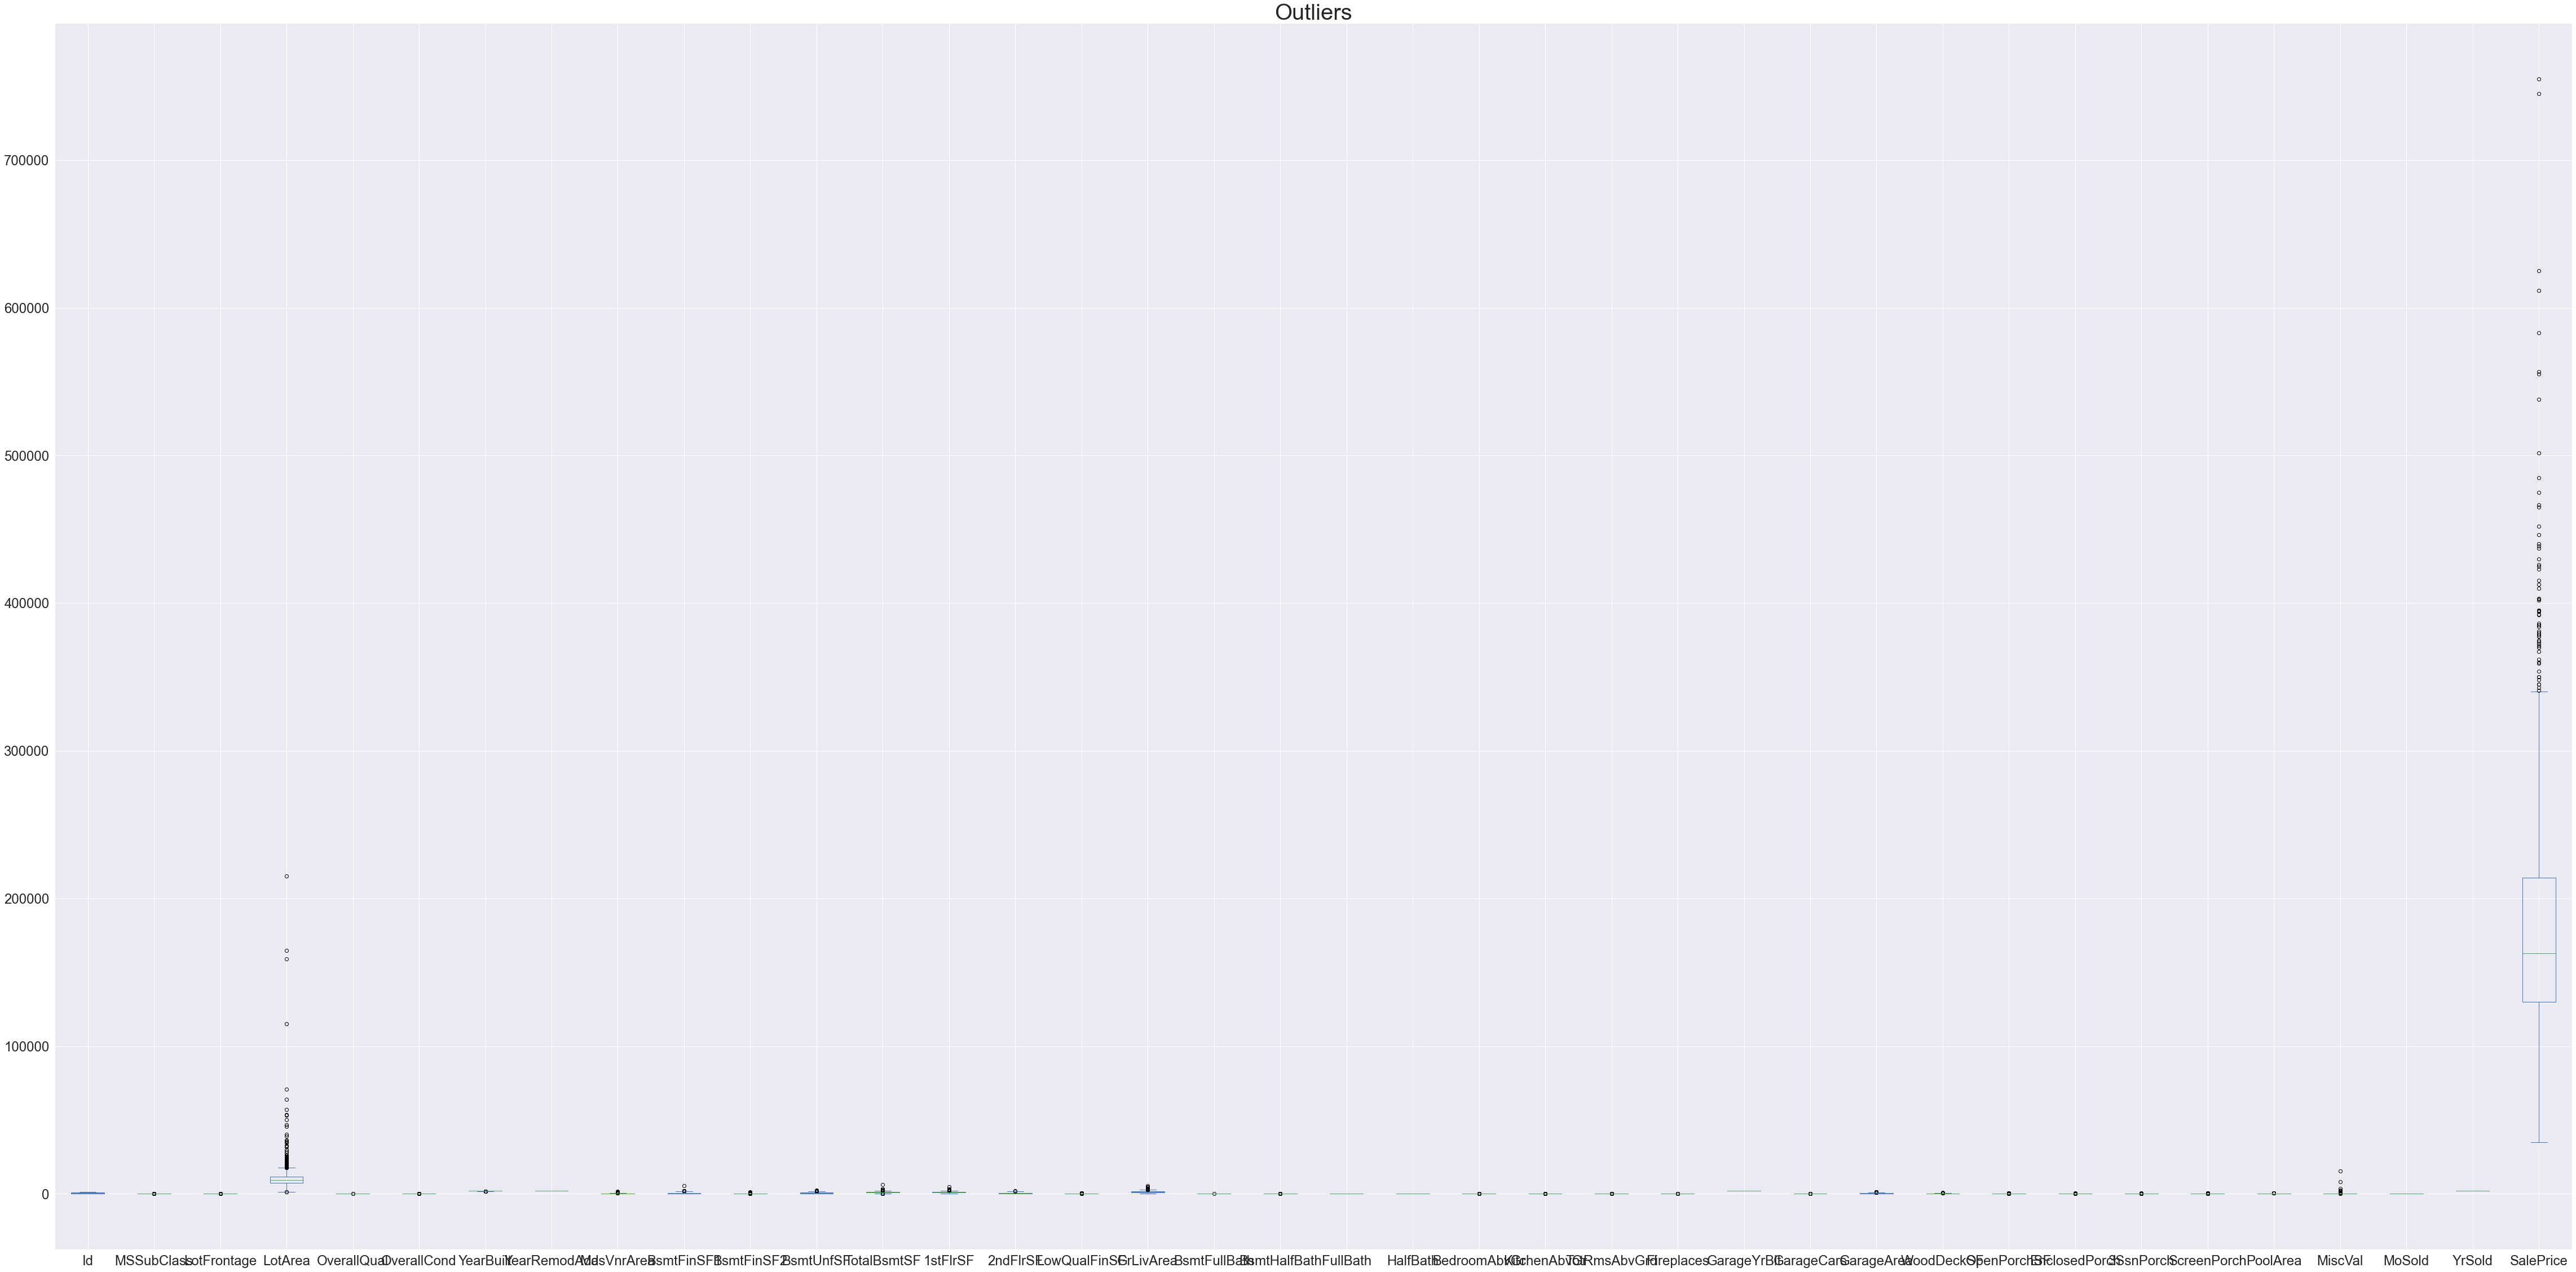

In [349]:
# visualise outliers with boxplot


fig=house.plot.box(title='Outliers', figsize=(80, 40), legend=True, fontsize=24)
fig.axes.title.set_size(40)


The plot shows that the column with the most variation and outliers is the dependant variable, `SalePrice`. `LotArea` has also some outliers

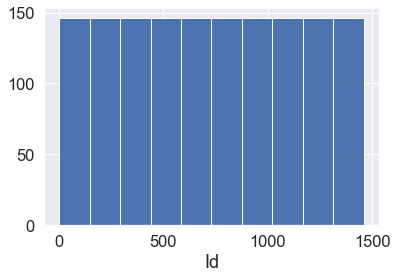

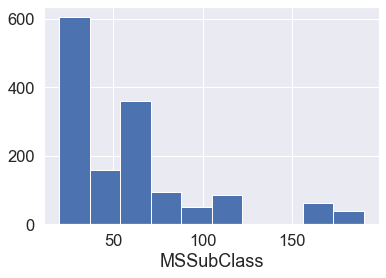

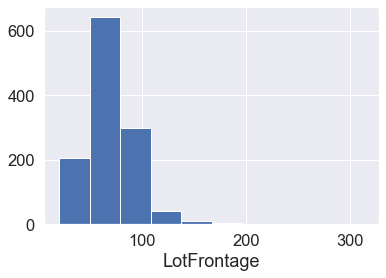

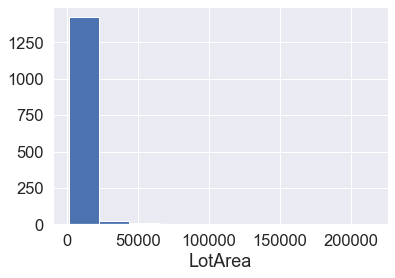

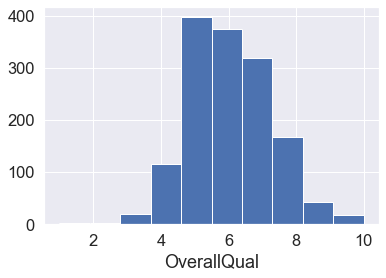

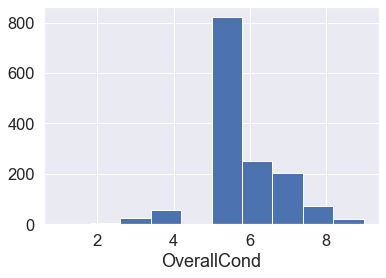

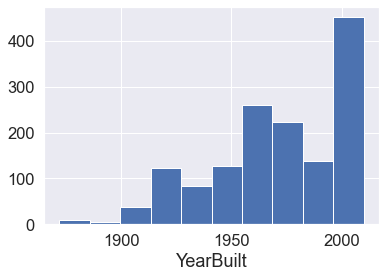

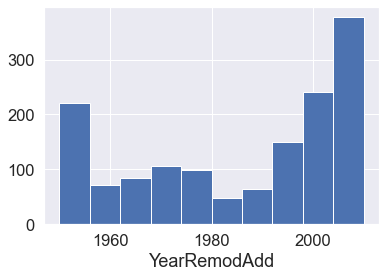

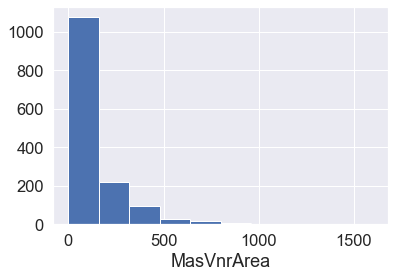

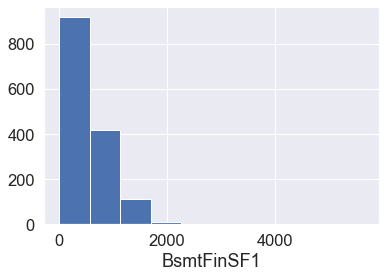

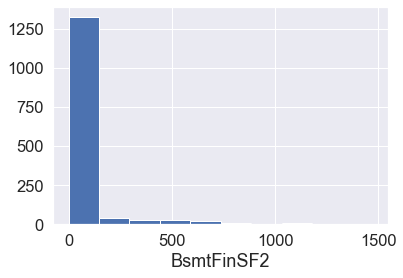

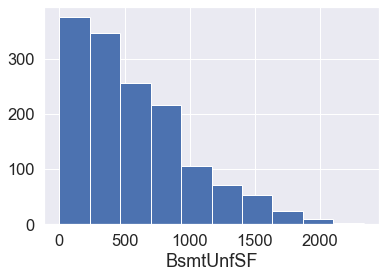

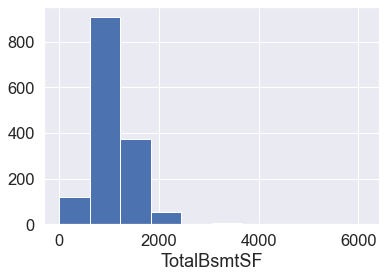

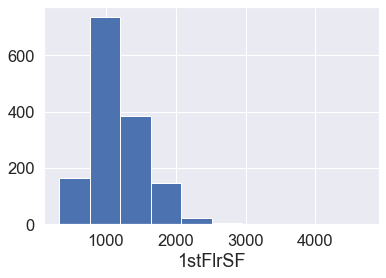

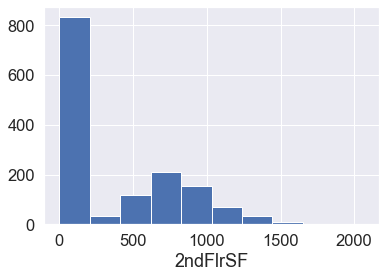

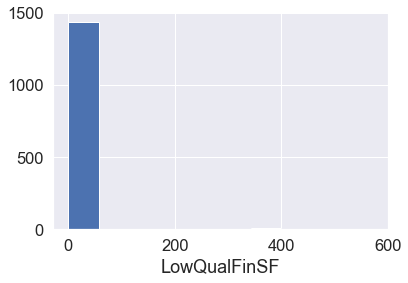

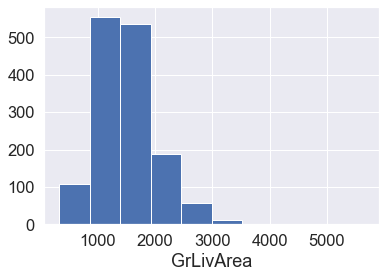

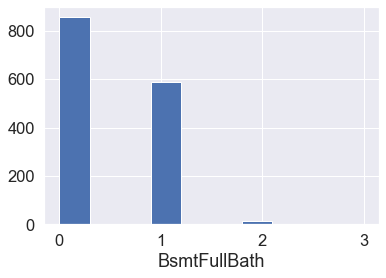

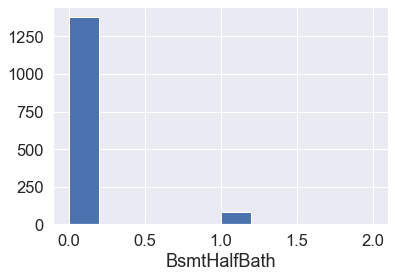

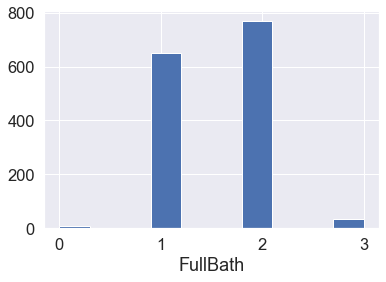

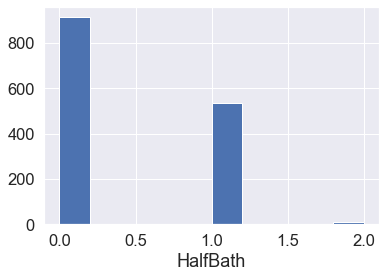

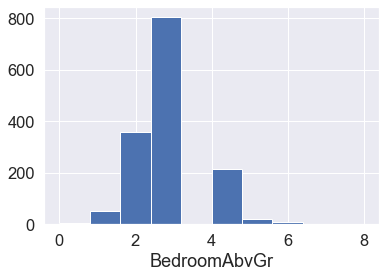

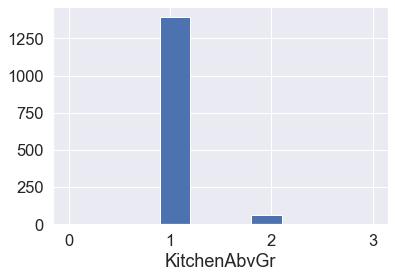

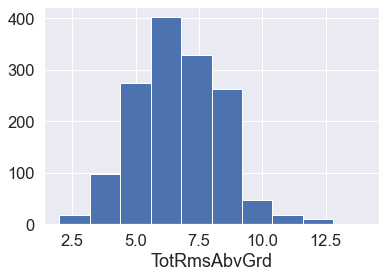

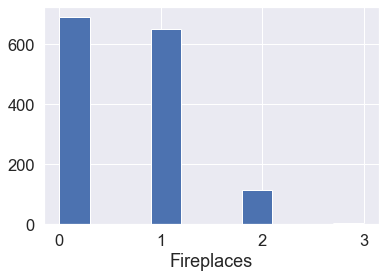

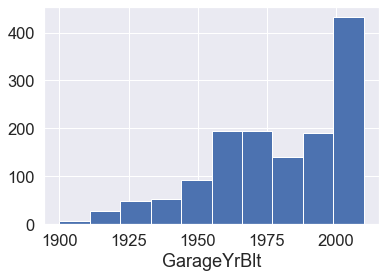

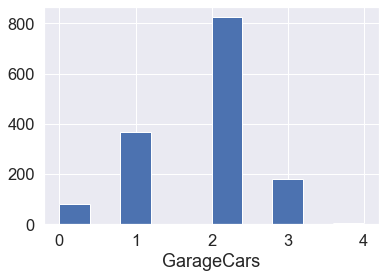

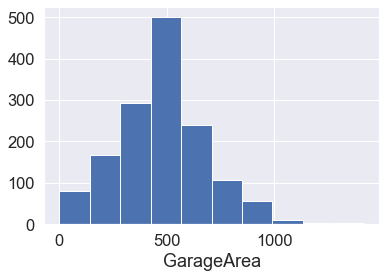

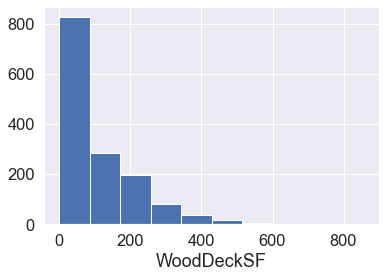

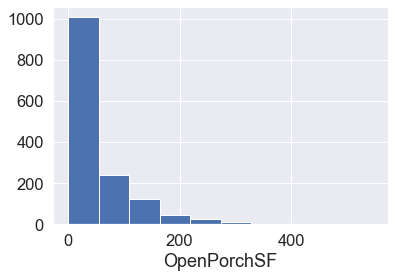

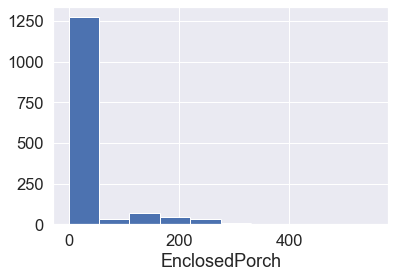

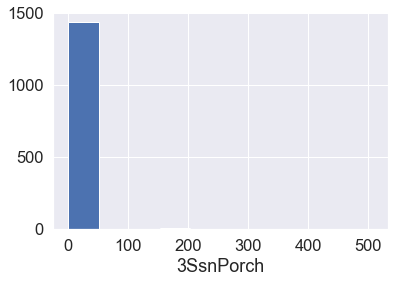

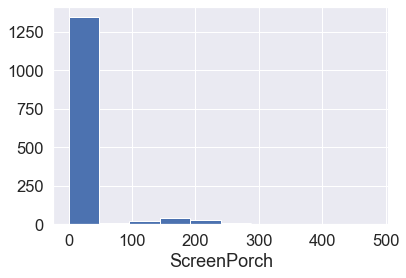

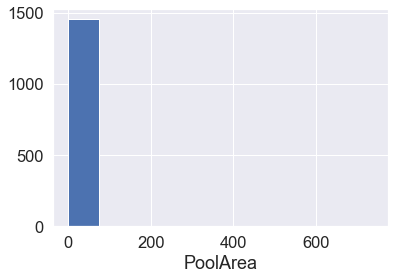

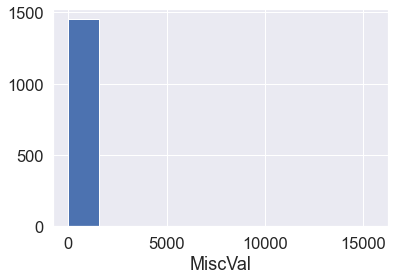

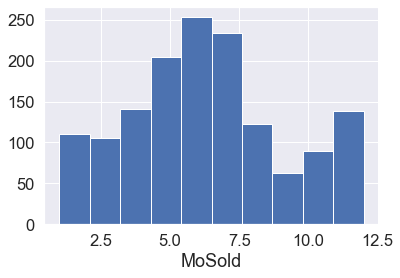

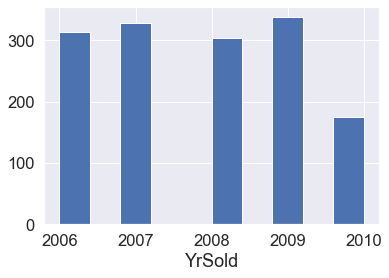

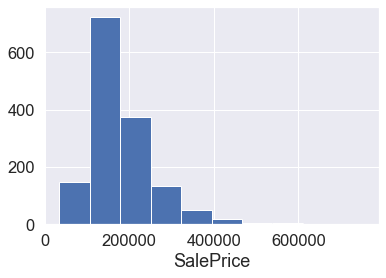

In [350]:
#checking for skewness in numerical data
numerical_features=[feature for feature in house.columns if house[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        
        house[feature].hist()
        plt.xlabel(feature)
        plt.show()

The histograms above describe the skewness of the data. They also suggest that `LowQualFinSF`, `PoolArea`, `MiscVal`, and `3SsnPorch` contain very little variety in values. This observation is checked through `value_counts`

In [351]:
print(house['LowQualFinSF'].value_counts())
print(house['PoolArea'].value_counts())
print(house['MiscVal'].value_counts())
print(house['3SsnPorch'].value_counts())

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304 

Printing the value counts confirmed that there is very little variation in value, so that there is not much information that would be added to the regression model with these columns. 
From a business logic standpoint, `PoolArea` is a similar variable to the previously dropped one. This is also the case for `MiscVal` - in additon, it has a rather high number of outliers. `3SsnPorch`appears to be contained in the other porch values. 
They are dropped as a result.

In [352]:
house=house.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [353]:
house.shape

(1460, 72)

If the variable is skewed, the mean is biased by the values at the far end of the distribution. The median is a better representation of the majority of the values in the variable. The histograms above are used to determine which features will use the median to impute the missing values.

In [354]:
# re-check the amount of missing values in the columns
columns_nan =  house.columns[house.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [355]:
#imputing the media
house['LotFrontage']=house['LotFrontage'].fillna(house['LotFrontage'].median())
house['GarageYrBlt']=house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())
house['MasVnrArea']=house['MasVnrArea'].fillna(house['MasVnrArea'].median())


In [356]:
#categorical values: imputing the mode
for col in ('MasVnrType', 'GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual', 'Electrical'):
    
    house[col] = house[col].fillna(house[col].mode()[0])

In [357]:
# checking for the presence of any more null values
house.isnull().values.any()

False

In [358]:
#check the shape of the dataset
house.shape

(1460, 72)

There are no more missing values in the dataset. The remaining data set contains 1460 rows and 72 columns of data.

In [359]:
#overview of the data
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110    15.060959     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    55.757415     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     8.000000  2009.000000  214000.000000
max    1460.000000   190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.000000  2010.0000

## 2.2 Outlier detection

The histograms indicated that not all data is normally distributed. However, even for the data that appears to be normally distributed, there may be outliers which was visualised above. This is addressed here.

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


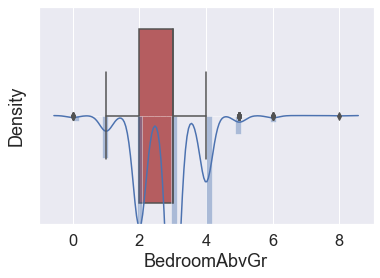

In [360]:
plt.figure()
sns.distplot(house['BedroomAbvGr'],color='b')
sns.boxplot(house['BedroomAbvGr'],color='r')
plt.show()

I discovered that it is possible to plot a distribution plot on top of a boxplot. I thought that this is actually a rather neat visualisation to show that similarities and differences between the two charts. Here, I am interested in visualising the outliers. It can be observed that both visualisations are successful in showing outliers. I chose the distribution for the remainder of the features.

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


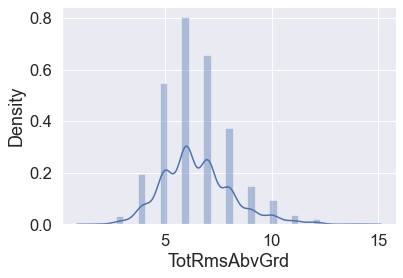

In [361]:
plt.figure()
sns.distplot(house['TotRmsAbvGrd'],color='b')
plt.show()

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


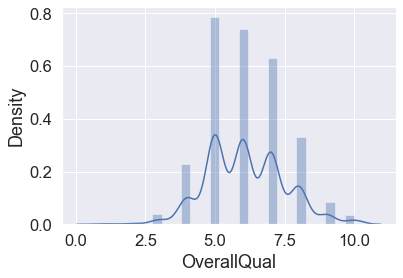

In [362]:
plt.figure()
sns.distplot(house['OverallQual'],color='b')
plt.show()

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


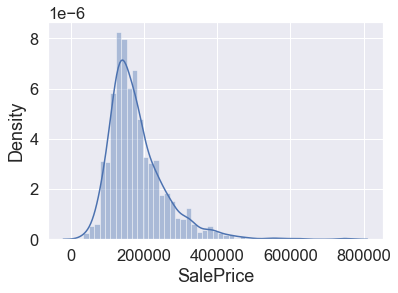

In [363]:
#visualise the dependent variable
plt.figure()
sns.distplot(house['SalePrice'],color='b')
plt.show()

After checking the seemingly normally distributed data, outliers were removed from the columns, based on the interquartile range.

In [364]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = house[cols].quantile(0.05)
Q3 = house[cols].quantile(0.95)
IQR = Q3 - Q1

house = house[~((house[cols] < (Q1 - 1.5 * IQR)) |(house[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In a next step, I compare how the outlier treatment has helped with the shape of the data.

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


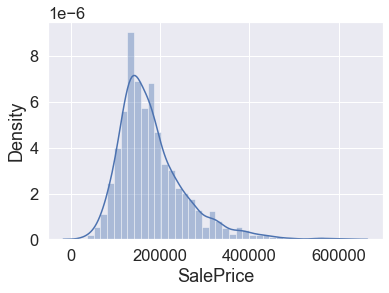

In [365]:
plt.figure()
sns.distplot(house['SalePrice'],color='b')
plt.show()

Some outliers have been removed. However, the target variable is skewed to the right. As a result, it is transformed using log and the result is visualised

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


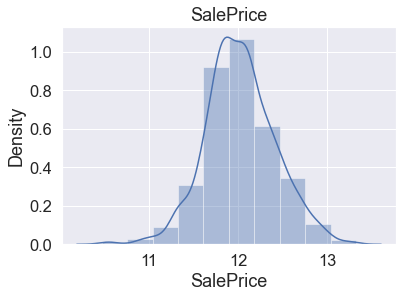

In [366]:
# Visualise the target variable -> SalePrice after transforming the sales price

house['SalePrice'] = np.log1p(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

The dependent variable has been normalised with some residual noise

# 3. Exploratory Data Analysis

Exploratory data analysis of the data set consisted of considerations of how to gain useful insights from the data.


In [367]:
# all numeric (float and int) variables in the dataset
house_num = house.select_dtypes(include=['float64', 'int64'])
house_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0   1          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008  12.247699
1   2          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007  12.109016
2   3          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008  12.317171
3   4          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272            0       2    2006  11.849405
4   5          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0            0      12    2008  12.429220

In [368]:
# dropping ID from numerical data and from the general data set as it does not add valuable information for the regression model
house = house.drop(['Id'], axis=1)
house_num = house_num.drop(['Id'], axis=1)
house_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008  12.247699
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007  12.109016
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008  12.317171
3          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272            0       2    2006  11.849405
4          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0            0      12    2008  12.429220

## 3.1 Visualising Numerical variables

<Figure size 720x360 with 0 Axes>

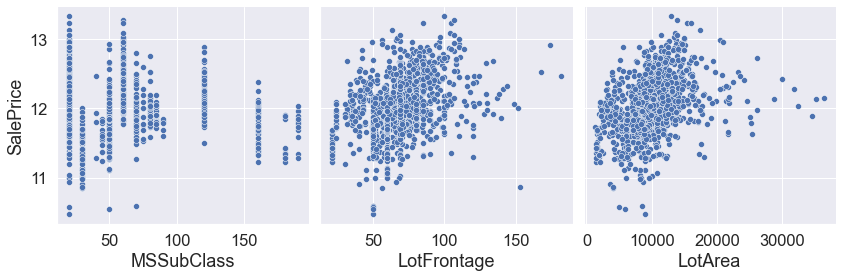

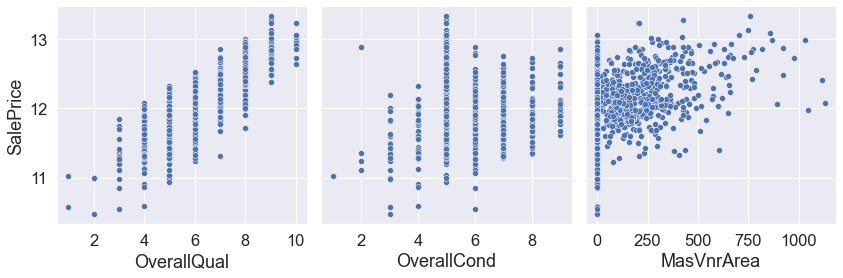

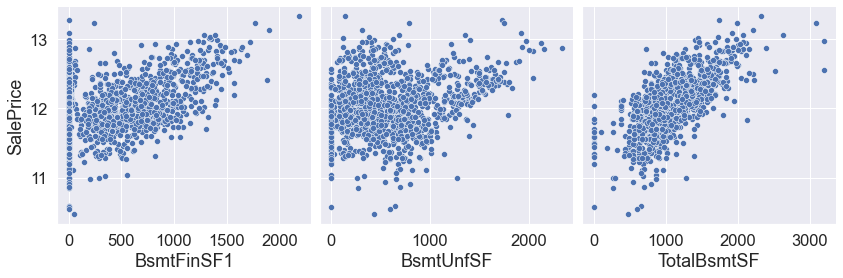

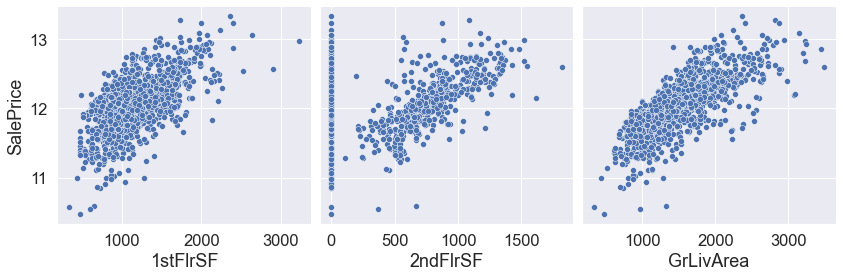

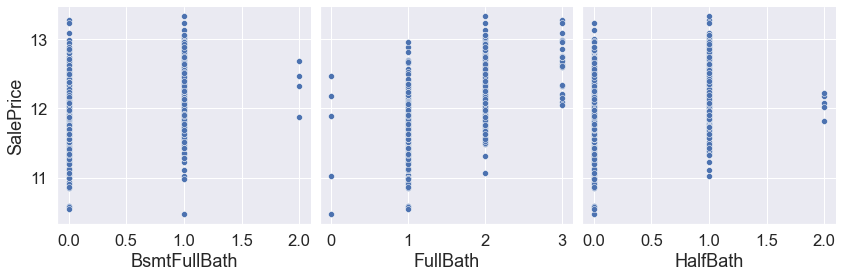

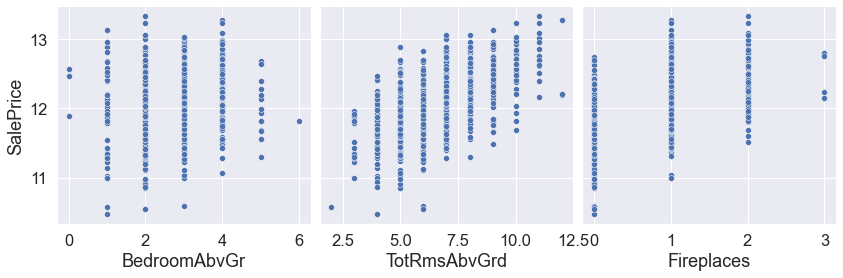

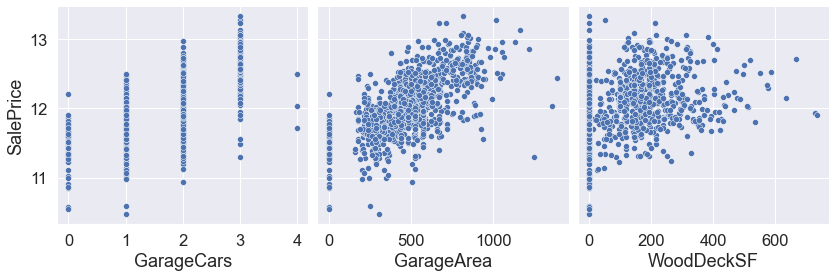

In [369]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

***
### Insight into numerical variables
The graphs show relations between selected variables and the dependent variable. 
`GrLivArea` shows the strongest linearity.
***

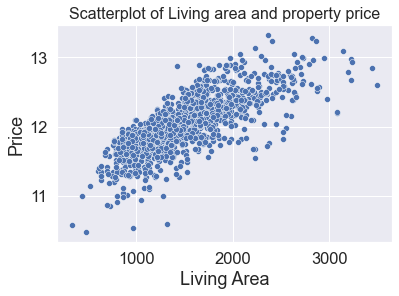

In [370]:
#scatter plot for temperature to count
sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=house)
plt.title('Scatterplot of Living area and property price', fontsize=16)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

***
### Insight into Living Area and price
While there is no clear correlation line, it appears that the larger the living area, the higher the price will be.
***

## 3.2 Identifying correlations

In [371]:

# correlation matrix
cor = house_num.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.425547 -0.372512     0.093568    -0.068312   0.118881      0.087547    0.048586   -0.057058   -0.061048  -0.160187    -0.257911 -0.301250  0.309988   0.046370      0.025093     -0.008811  0.102868  0.228561     -0.119048           NaN     -0.044201   -0.011048     0.124770   -0.003834   -0.074741    0.011925     0.024753      -0.041677    -0.023761 -0.017924 -0.030006  -0.033606
LotFrontage     -0.425547     1.000000  0.526729     0.220060    -0.063988   0.133988      0.079399    0.165461    0.135812    0.037861   0.148522     0.321598  0.364081  0.040980   0.313127      0.056625     -0.013850  0.172413  0.043189      0.261870           NaN      0.321784    0.227115     0.080191    0.290353    0.317449    0.091117     0.123925      -0.000104     0.053106  0.012437  0.015370   0.364280
LotArea         -0.372512     0.526729  1.000000     0.158632    -0.028698   0.054476      0.019139    0.136209    0.186061    0.056191   0.074307     0.300370  0.389969  0.088901   0.372146      0.090548      0.045868  0.166575  0.078653      0.274813           NaN      0.352086    0.300367     0.002089    0.283762    0.321187    0.176458     0.147972      -0.013890     0.093827 -0.010367 -0.018141   0.373936
OverallQual      0.093568     0.220060  0.158632     1.000000    -0.134884   0.594482      0.548493    0.415394    0.203358   -0.109144   0.338616     0.552030  0.496834  0.288280   0.622627      0.099497     -0.057984  0.613939  0.260103      0.141440           NaN      0.499850    0.379625     0.528339    0.625290    0.564754    0.225894     0.318338      -0.126046     0.040562  0.086078 -0.007288   0.823638
OverallCond     -0.068312    -0.063988 -0.028698    -0.134884     1.000000  -0.396008      0.042184   -0.136614   -0.037206    0.049467  -0.153006    -0.190745 -0.141005  0.006844  -0.101142     -0.044253      0.134675 -0.212100 -0.071504      0.015941           NaN     -0.058143   -0.050152    -0.337851   -0.205957   -0.173479   -0.024767    -0.068616       0.081037     0.041587  0.001168  0.042487  -0.075506
YearBuilt        0.118881     0.133988  0.054476     0.594482    -0.396008   1.000000      0.611149    0.315152    0.240937   -0.078532   0.178448     0.427143  0.308710  0.054116   0.265671      0.181886     -0.041551  0.553235  0.238276     -0.033658           NaN      0.173813    0.149401     0.796183    0.572425    0.509830    0.226381     0.254271      -0.388191    -0.042973  0.018259 -0.010942   0.616510
YearRemodAdd     0.087547     0.079399  0.019139     0.548493     0.042184   0.611149      1.000000    0.179898    0.107205   -0.100204   0.208382     0.309117  0.263095  0.150882   0.323810      0.110941     -0.020045  0.495403  0.173512     -0.018494           NaN      0.249797    0.093903     0.624350    0.451437    0.390552    0.191182     0.253294      -0.209257    -0.047794  0.026091  0.046591   0.568793
MasVnrArea       0.048586     0.165461  0.136209     0.415394    -0.136614   0.315152      0.179898    1.000000    0.230565   -0.066045   0.123286     0.359799  0.343659  0.141948   0.378636      0.093667      0.002023  0.273787  0.195881      0.096081           NaN      0.291369    0.256418     0.251663    0.375918    0.378886    0.157370     0.131969      -0.102546     0.058424 -0.005703  0.009243   0.440150
BsmtFinSF1      -0.057058     0.135812  0.186061     0.203358    -0.037206   0.240937      0.107205    0.230565    1.000000   -0.056094  -0.544591     0.455673  0.400085 -0.194420   0.125712      0.656119      0.059480  0.057865 -0.039155     -0.113098           NaN      0.024181    0.225

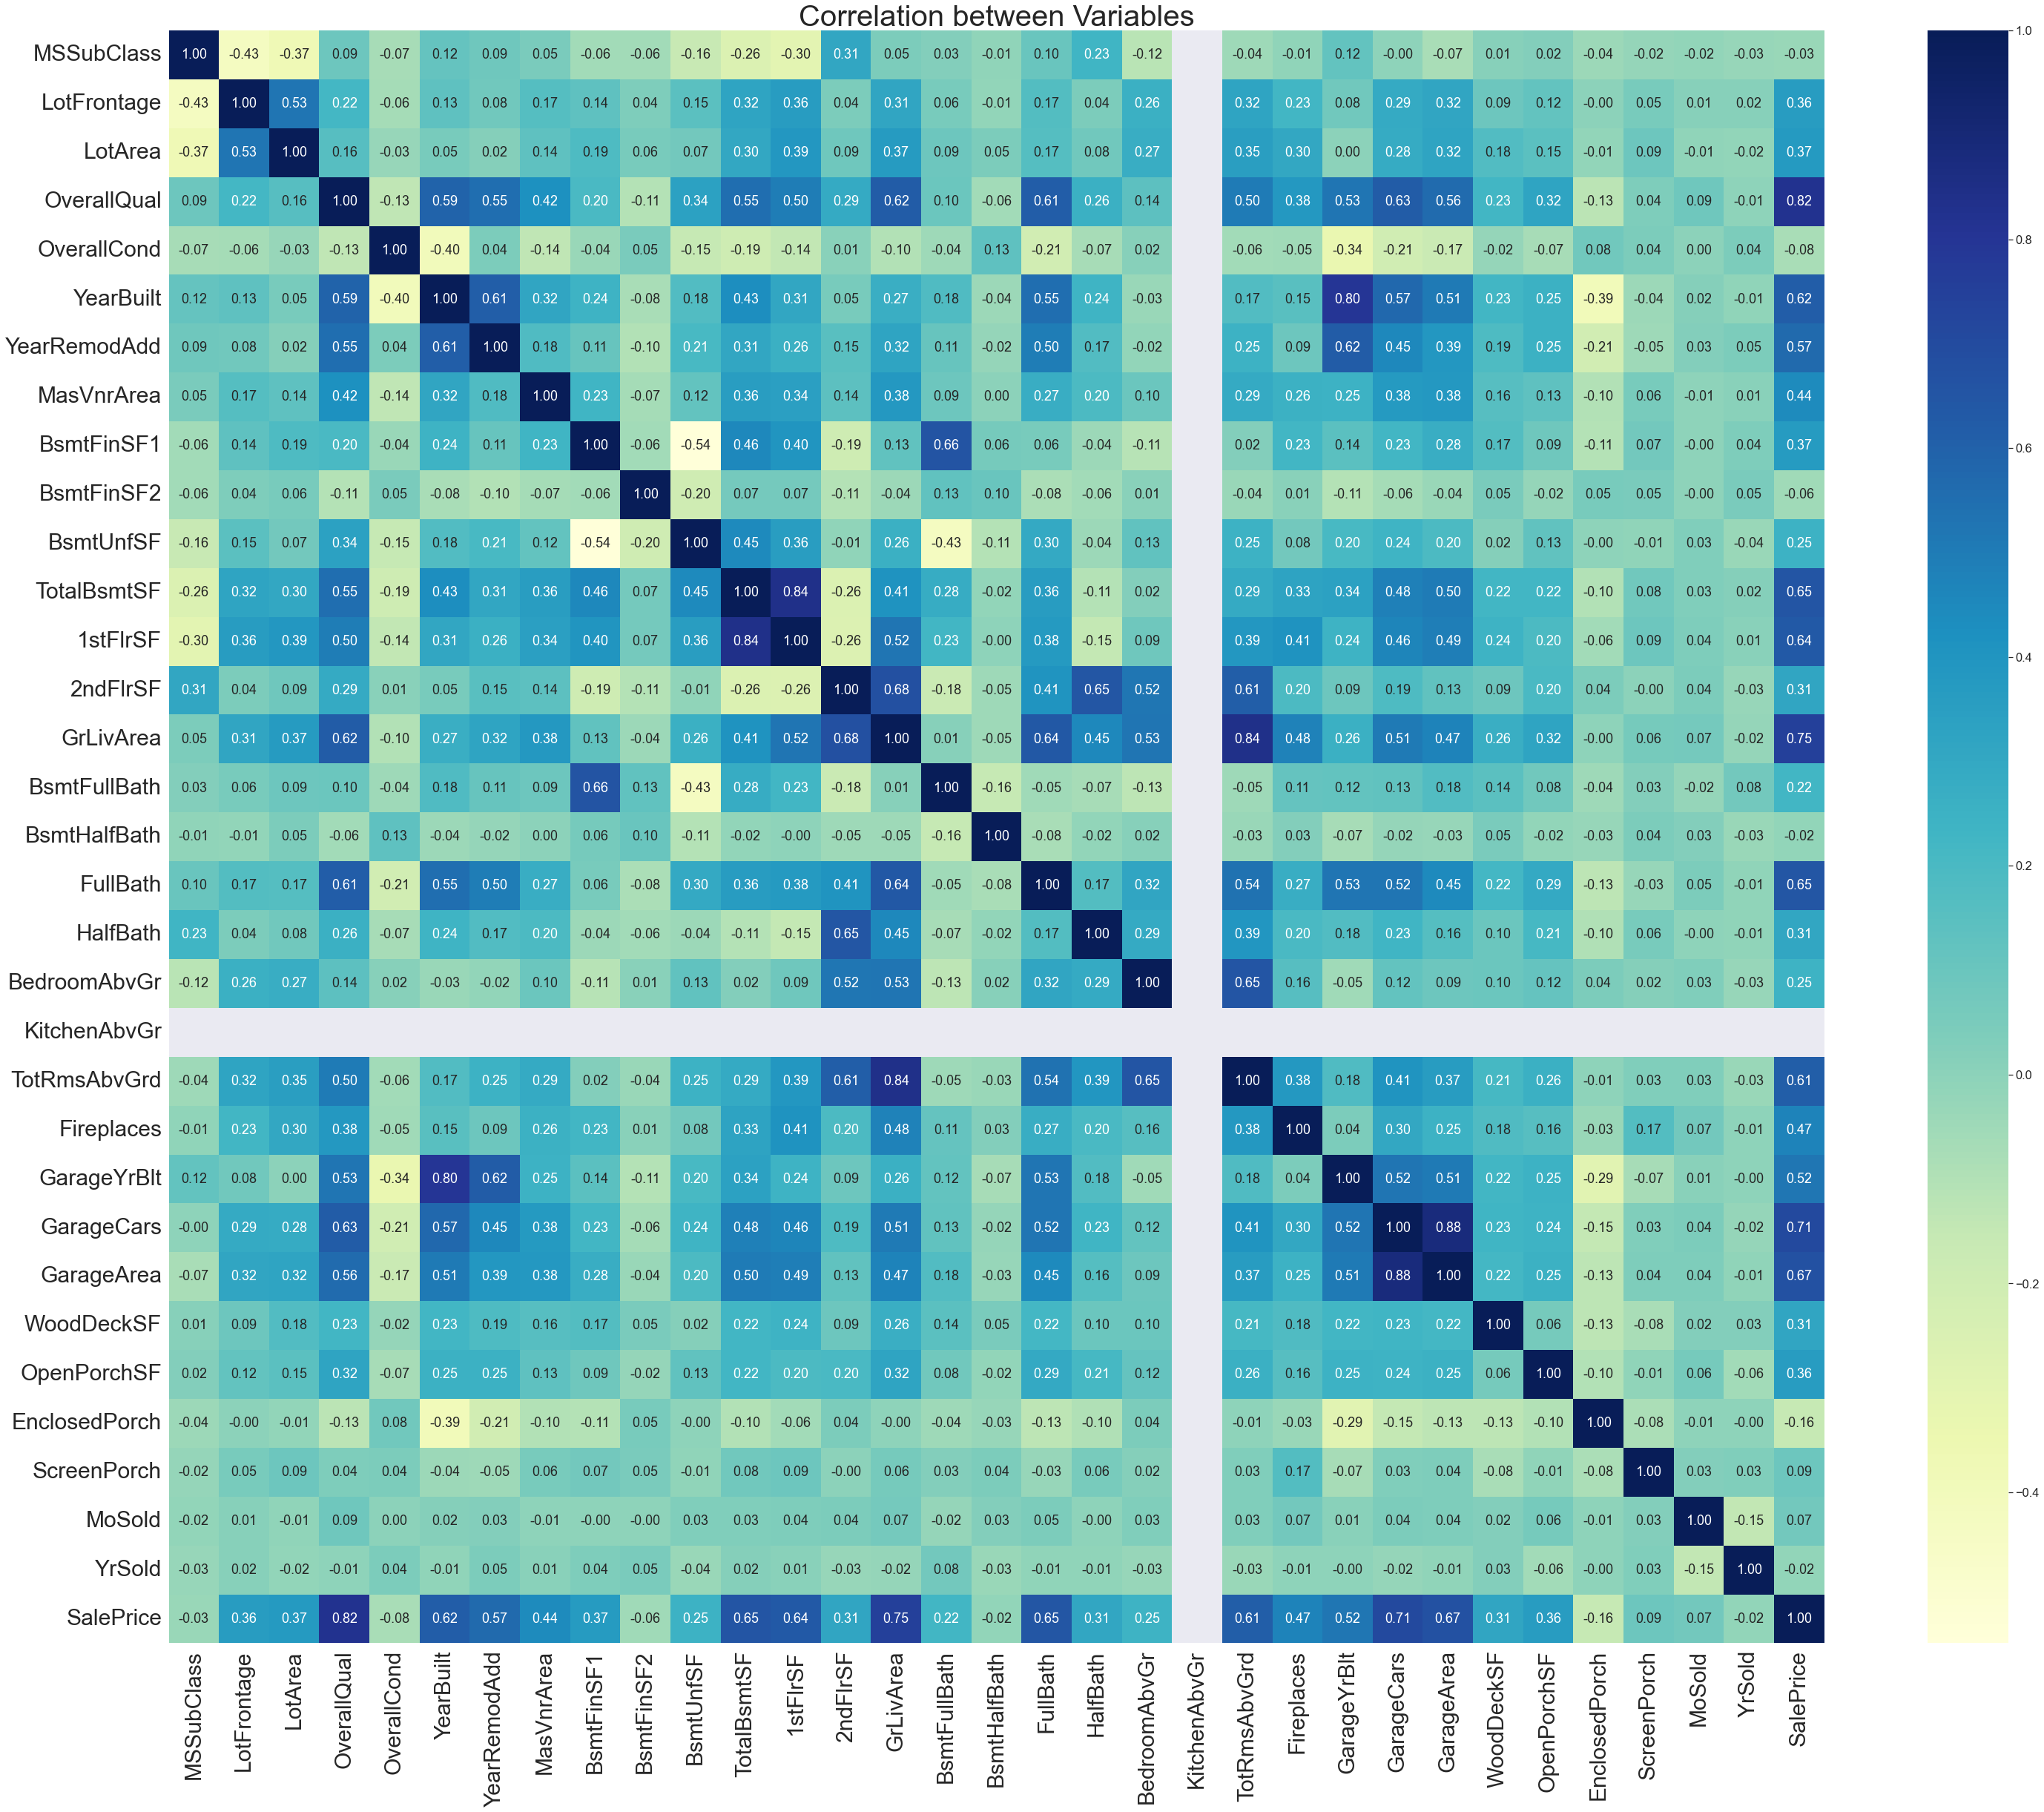

In [372]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

## 3.3 Dropping unnecessary columns

Insights from the heatmap:
Correlation of sale price with independent variables:
- `Sale price` is highly positively correlated with `OverallQual`, `GrLivArea`
- `Sale price` is positively correlated with `TotalBsmtSF`, `1stFlrSF`, `FullBath`, `TotRmsAbvGrd`, `GarageCars`, `GarageArea`
- `Sale price` is not highly negatively correlated with other variables. 
Some independent variables are highly correlated with each other. This has to be considered because of multicollinearity that may become an issue in the model
- `Yearbuilt` `GarageYrBlt` are highly correlated
- `TotRmsAbvGrd` `GrLivArea` are highly correlated
- `GarageArea` `GarageCars` are highly correlated
- `1stFlrSF` `TotalBsmtSF` are highly correlated

One of the highly correlated variables above is dropped

In [373]:
house.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

In a next step, I visualised the 20 most highly correlated variables to `Sale Price`.

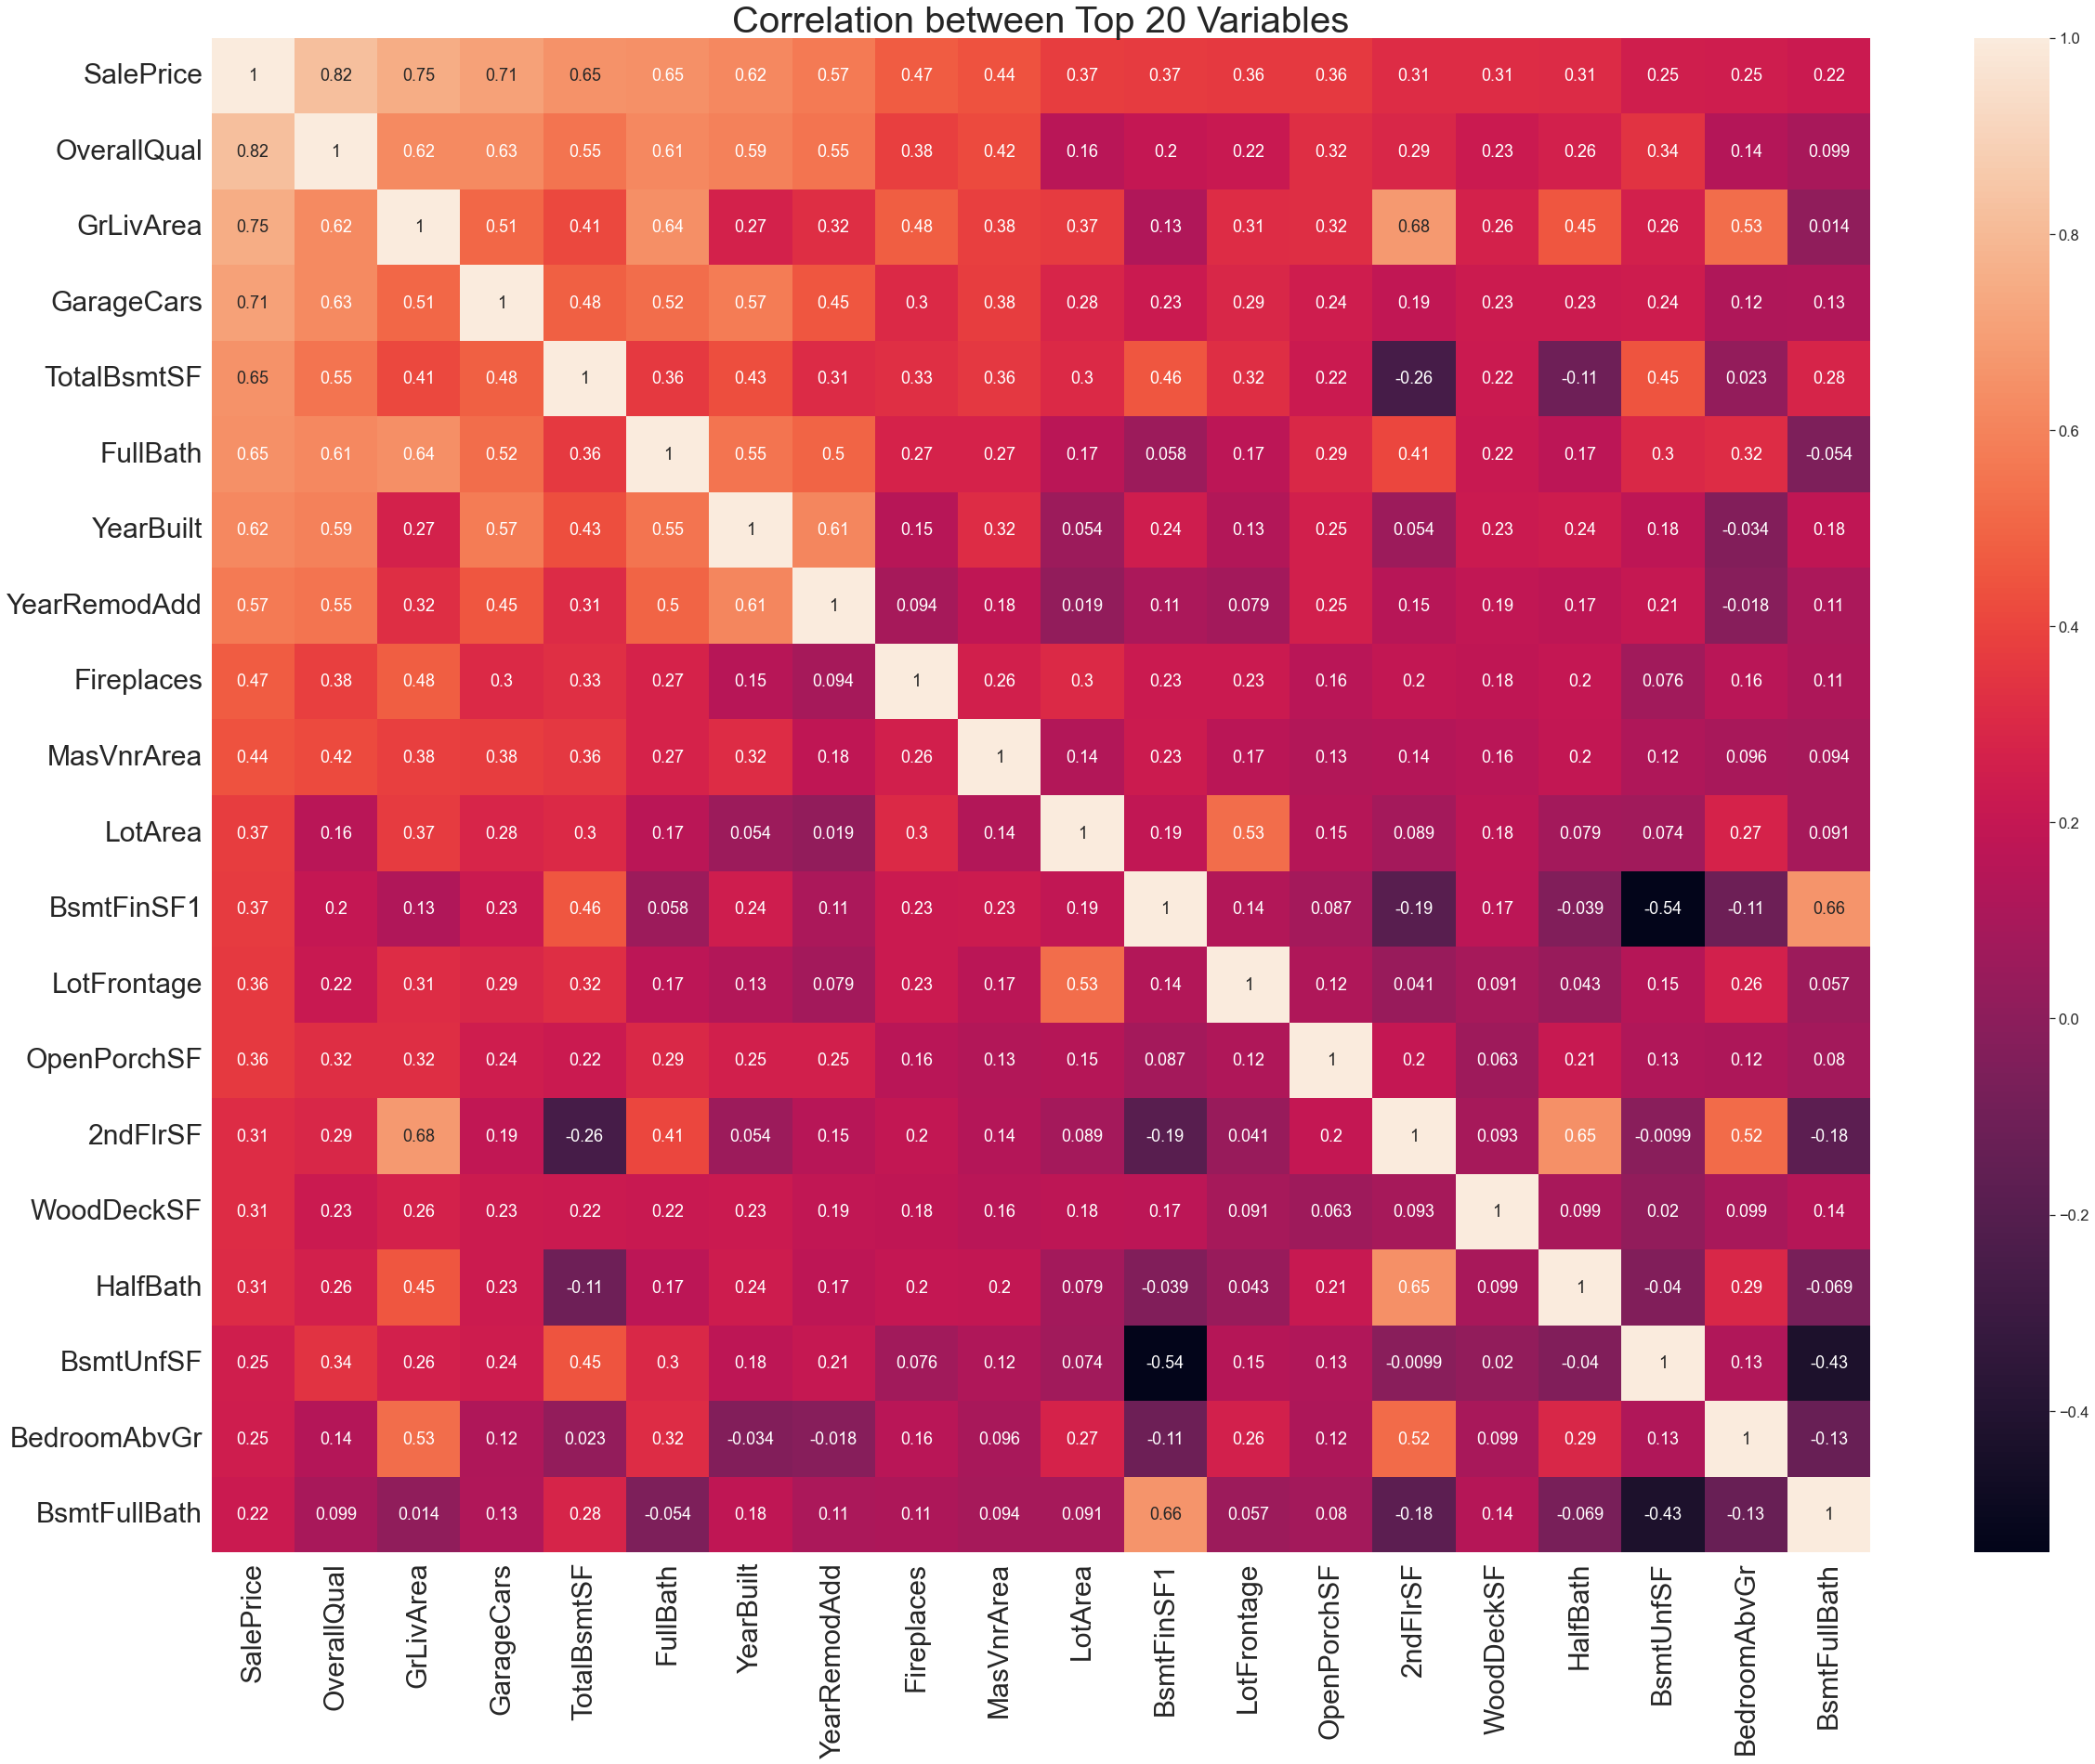

In [374]:
# sales price correlation matrix
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
n = 20 # number of variables which have the highest correlation with 'Sales price'

corrmat = house.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(house[cols].corr(),annot=True)
plt.title("Correlation between Top 20 Variables", fontsize=40)
plt.show()

# 4. Data preparation
In this step, the data is prepared for building a regression model. These individual steps are:
- 4.1 create dummy variables for all categorical features
- 4.2 divide the data to train and test
- 4.3 perform scaling
- 4.4 divide data into dependent and independent variables

## 4.1 Creating dummy variables

The dataset contains a couple of categorical values. This means that the variable is changed so that it is represented by only the value 0 or 1 to show the absence or presence which may shift the outcome of the prediction in a linear regression analysis. Creating dummy variables is useful, because the variable is more flexible and allows multiple comparisons to be made.

First, categorical variables are mapped to a string, then converted to a dummy variable, using n-1 to ensure that there is multicollinearity between dummy variables.

In [375]:
#Check which columns containg categorical data
house_categorical=house.select_dtypes(include=['object'])
house_categorical.head()


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ     Detchd          Unf         TA         TA          Y       WD       Abnorml
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal

In [376]:
# Convert categorical value into Dummy variables (one hot encoding)
house_dummies=pd.get_dummies(house_categorical,drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Norm  Condition2_PosN  Condition2_RRNn  \
0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                1                0                0   
1            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     1                 1                0                0                0                0                0                0                0                1                0                0   
2            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                1                0                0   
3            0            0            1            0          

In [377]:
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Norm  Condition2_PosN  Condition2_RRNn  \
0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                1                0                0   
1            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     1                 1                0                0                0                0                0                0                0                1                0                0   
2            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                1                0                0   
3            0            0            1            0          

## 4.2 Scaling Data

In [378]:
# drop categorical variables from the dataset and save as predictor variable X
X= house.drop(list(house_categorical.columns), axis=1)

In [379]:
#removing response variable from the set
X=X.drop(['SalePrice'], axis=1)

In [380]:
y = house['SalePrice'] # response variable in Y

In [381]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [382]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       854       1710             1             0         2         1             3             1           0           2           0           61              0            0       2    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262         0       1262             0             1         2         0             3             1           1           2         298            0              0            0       5    2007            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       866       1786             1             0         2         1             3             1           1           2           0           42              0            0       9    2008            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
3          70         60.0     9550            7            5       1915   

In [383]:
# storing column names in cols (the df is converted to a numpy array)
# Standardize a dataset along any axis
# Center to the mean and component wise scale to unit variance.
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=216)

In [384]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0    0.142926    -0.214729 -0.301556     0.643699    -0.537949   1.025211      0.848046    0.557189    0.630373   -0.290924  -0.969815    -0.487945  1.229848   0.474147      1.169112     -0.240343  0.861001  1.237099      0.242585           0.0   -0.973602    0.316608   -0.771856     0.249754      -0.360841    -0.272137 -1.592437  0.138990    -0.222566    -0.090435     0.510121    -0.412279     0.060836     -0.157935     -0.077037      0.760644         -0.18527        -0.139817         0.317253         -0.027166          -0.256978       -0.18527      -0.054393          0.615996      -0.213283      -0.072035             -0.038433            -0.109272             -0.209475             -0.122352              2.835489             -0.191565             -0.266627             -0.248724            -0.162773             -0.112677             -0.178783           -0.424449             -0.081741            -0.229772             -0.167486             -0.245364              -0.26821   
1   -0.849686     0.537784 -0.022178    -0.095383     2.183911   0.116681     -0.461085   -0.593667    1.271641   -0.290924  -0.660993     0.538541 -0.791853  -0.456394     -0.835080      4.047877  0.861001 -0.783993      0.242585           0.0    0.617006    0.316608    1.674266    -0.751685      -0.360841    -0.272137 -0.482424 -0.614891    -0.222566    -0.090435     0.510121    -0.412279     0.060836     -0.157935     -0.077037      0.760644         -0.18527        -0.139817         0.317253         -0.027166          -0.256978        5.39753      -0.054393         -1.623388      -0.213283      -0.072035             -0.038433            -0.109272             -0.209475             -0.122352             -0.352673             -0.191565             -0.266627             -0.248724            -0.162773             -0.112677             -0.178783           -0.424449             -0.081741            -0.229772             -0.167486             -0.245364              -0.26821   
2    0.142926    -0.064226  0.378669     0.643699    -0.537949   0.957913      0.799559    0.357551    0.111701   -0.290924  -0.315296    -0.326135  1.258256   0.632007      1.169112     -0.240343  0.861001  1.237099      0.242585           0.0    0.617006    0.316608   -0.771856    -0.062169      -0.360841    -0.272137  0.997592  0.138990    -0.222566    -0.090435     0.510121    -0.412279     0.060836     -0.157935     -0.077037     -1.314675         -0.18527        -0.139817         0.317253         -0.027166          -0.256978       -0.18527      -0.054393          0.615996      -0.213283      -0.072035             -0.038433            -0.109272             -0.209475             -0.122352              2.835489             -0.191565             -0.266627             -0.248724            -0.162773             -0.112677             -0.178783           -0.424449             -0.081741            -0.229772             -0.167486             -0.245364              -0.26821   
3    0.391079    -0.465566 -0.034325     0.643699    -0

## 4.3 Spliting the dataset
The data set is divided into two subsets: the training set (70%) to train the model and a test set (30%) to test the trained model. The aim is to create a training set that is representative of the data set as a whole. To do this, the rows are selected randomly from the data.

In [385]:
# split into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 5. Feature Engineering
### Data modelling and evaluation
The aims of this section are:
- create linear regression model using no feature elimination
- use ridge and lasso 
- report the final model

## 5.1 Linear Model

In [386]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)



LinearRegression()

In [387]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-17289691.630324177
[-4.34462820e-02  1.07415030e-02  2.88452859e-02  5.10789366e-02
  4.33735576e-02  4.32428232e-02  9.06379521e-03 -6.63665045e-03
 -7.17470073e+10 -2.30036788e+10 -7.33956598e+10  6.69032369e+10
 -2.93565203e-03  1.24344043e-01  1.55766299e-02  2.16444676e-03
  1.60433065e-02  1.22586730e-02  1.06469480e-03 -9.39852449e+10
  6.24354183e-03  4.17976193e-02  5.99603355e-03  2.45569310e-03
  4.70918540e-03  1.27269620e-02  2.38708325e-04 -1.77512344e-03
  8.31897235e-02  3.52236161e-02  1.63009196e-01  1.33590202e-01
  2.07501818e-03 -1.15823746e-03 -1.45053864e-03  1.39197707e-03
  8.53347778e-03 -8.44573975e-03  1.15203857e-03 -7.52639771e-03
  5.15937805e-03 -5.87069988e-03 -2.78472900e-04 -1.99890137e-03
 -4.09507751e-03 -2.81114578e-02 -1.50680542e-04 -6.87694550e-03
 -5.29956818e-03 -2.41553783e-03 -1.17702484e-02  1.06716156e-02
 -2.68344879e-02 -1.27906799e-02 -9.79328156e-03 -1.62181854e-02
 -1.68364048e-02 -2.81071663e-02 -3.26919556e-03 -1.51634216e-02
 -9.1

In [388]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train:  0.9559849557118331
r2 test:  -1.1994146136536437e+23
rss1:  6.568229072530112
rss2:  6.843622435812979e+24
MSE train:  0.0069212108245838904
MSE test:  1.681479713958963e+22


The model using all of the features is highly overfitting. R2 is negative only when the chosen model does not follow the trend of the data, that is, the fit is worse than a horizontal line. This model is highly problematic. It shows a high score in the training data, but this will be due to the model learning the data and overfitting on the training data.
In the following step, ridge and lasso are applied to compare the result.

## 5.2 Ridge and Lasso Regression
### 5.2.1 Ridge Regression

Here, Ridge and Lasso are employed to see how the model changes

In [389]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [390]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 100}
-0.08354539471169377


In [391]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-8.88127399e-03,  1.27376531e-02,  2.61363850e-02,  5.68655729e-02,
        3.52405031e-02,  2.09275827e-02,  1.85267226e-02,  9.96181756e-04,
        3.28655553e-02,  2.87803477e-03,  1.16790024e-02,  4.90469350e-02,
        1.75209465e-02,  7.48560083e-02,  1.43169172e-02,  3.33013221e-04,
        2.39696768e-02,  1.67593909e-02,  9.06043528e-03,  0.00000000e+00,
        1.42206997e-02,  3.84266271e-02,  6.83597608e-03,  4.69784103e-03,
        1.17026554e-03,  1.10841452e-02, -1.41248008e-05, -9.86262965e-04,
        6.99675636e-03,  1.50456735e-03,  1.90093430e-02,  8.66457256e-03,
        8.40348002e-03, -4.37379617e-04, -1.74434860e-03, -4.74241872e-04,
        3.72338328e-03, -9.22440587e-03, -1.25387533e-03, -4.58987973e-03,
        6.38975100e-03, -5.69521846e-03, -9.04882318e-04, -3.67766435e-03,
       -9.57398133e-04, -1.38682073e-02,  1.17395401e-03, -2.91229353e-03,
        3.11016983e-03,  2.37823910e-03, -9.62086602e-04,  1.81442816e-02,
       -1.25371371e-02, -

In [392]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9490684386473656
0.8994839618501187
7.600359545148973
5.735246227708586
0.008008808793623786
0.01409151407299407


The model is fitting better than the none-regularised version seen above. All features are retained in ridge regression. There is a gap beetween training and testing score. The training score is slightly lower than the regression model before, but the testing score is much better than the previous version.

### 5.2.2 Lasso Regression

Lasso regression auto selects important features.

In [393]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e-02, tolerance: 1.219e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [394]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.08244286061931508


In [395]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [396]:
lasso.coef_

array([-4.14965681e-03,  1.16738609e-02,  2.47961699e-02,  6.56291121e-02,
        4.38462391e-02,  4.38044557e-02,  1.21085712e-02, -5.64890870e-04,
        2.81697915e-02,  0.00000000e+00, -0.00000000e+00,  4.85047418e-02,
        0.00000000e+00,  1.28691890e-01,  1.50025182e-02,  0.00000000e+00,
        1.47714341e-02,  1.07636078e-02,  2.85447952e-04,  0.00000000e+00,
        6.90374854e-03,  3.91504011e-02,  4.43380562e-03,  1.13466082e-03,
        2.22950255e-03,  1.12742906e-02,  0.00000000e+00, -0.00000000e+00,
        1.40265999e-02,  4.96662849e-03,  4.01944633e-02,  2.43690036e-02,
        6.58303125e-03, -0.00000000e+00, -7.97504997e-04, -0.00000000e+00,
        3.30534653e-03, -8.87998726e-03, -0.00000000e+00, -2.94905514e-03,
        4.62679207e-03, -2.50319021e-03,  0.00000000e+00, -2.18504122e-03,
       -0.00000000e+00, -1.35777528e-02,  7.62381090e-04, -6.02073988e-04,
        6.53264039e-03,  1.28977357e-03,  1.57751785e-03,  2.01215193e-02,
       -7.12039699e-03, -

<AxesSubplot:title={'center':'Modal Coefficients'}>

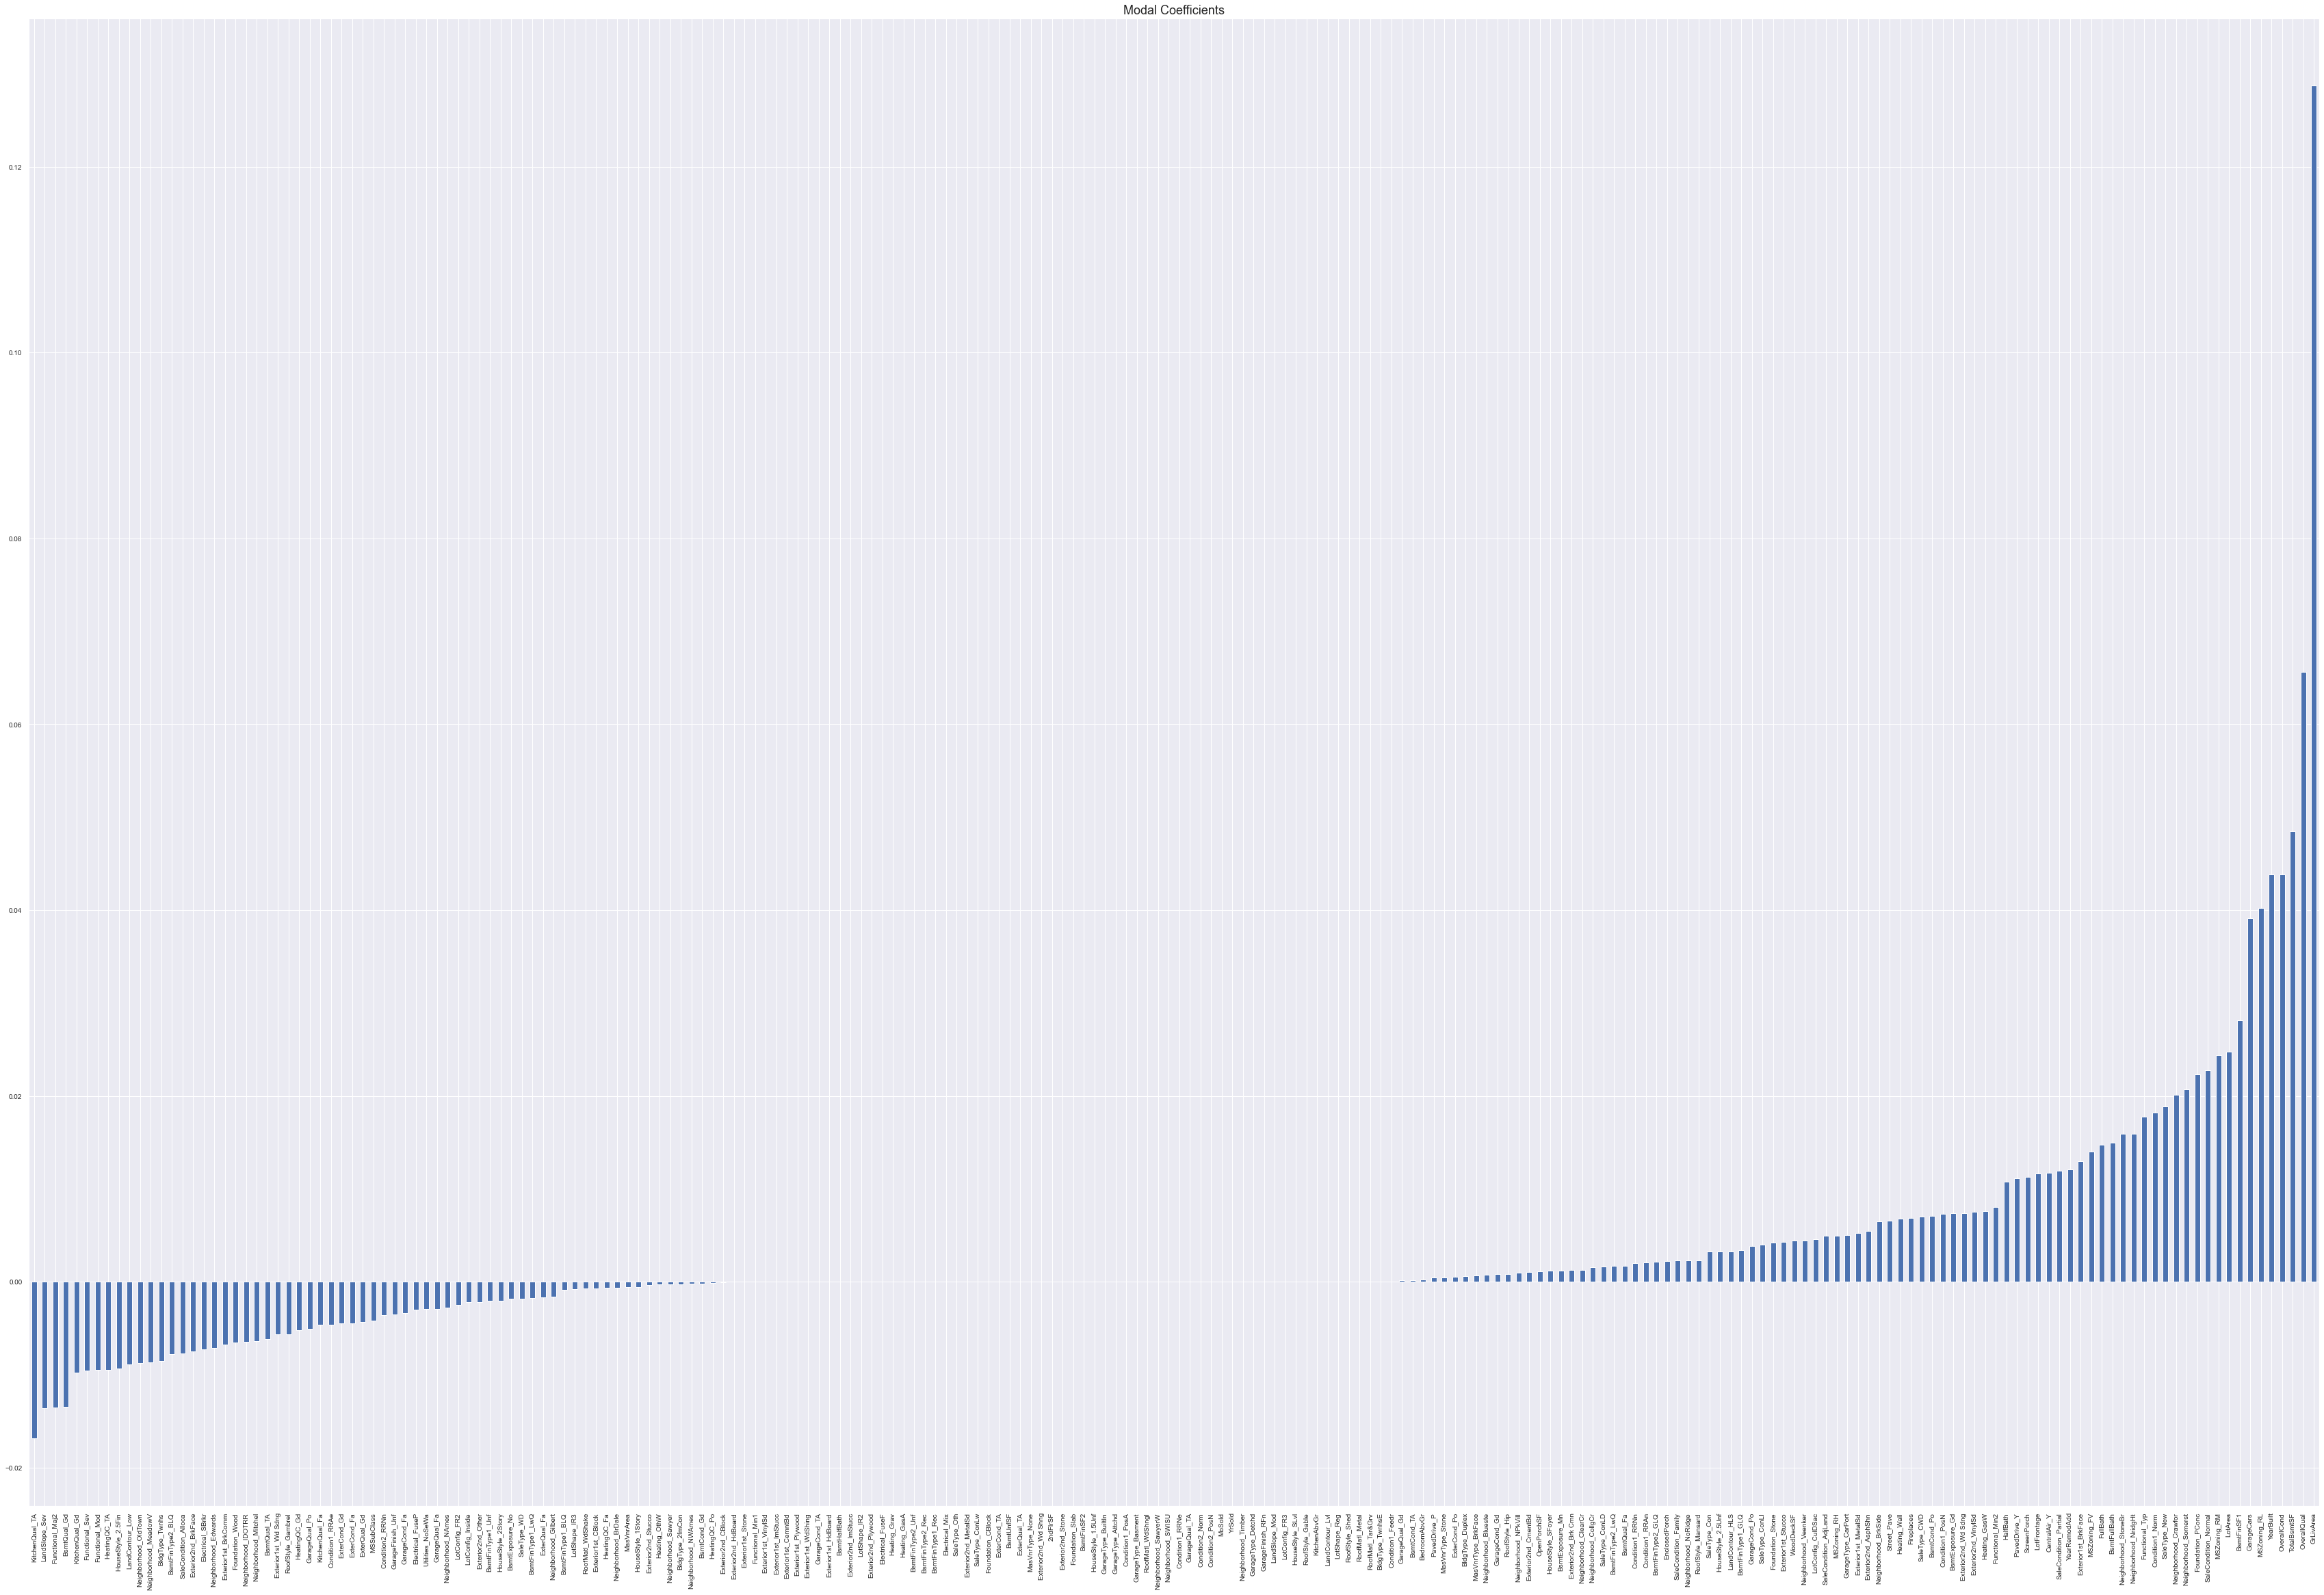

In [397]:
predictors = X_train.columns

coef = pd.Series(lasso.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients', fontsize='16',figsize=(80, 60))

This is a visualisation of the predictor values. The left side denotes negative impact, the right side positive impact. It can be noted that GrLivArea has by far the largest impact.

In [398]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9507423505648409
0.901258786361074
7.350566841335376
5.633978253277247
0.007745592035126845
0.013842698411000607


The result is similar to Ridge, but the test result is better.

In [399]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.559850e-01          0.949068          0.950742
1   R2 Score (Test)      -1.199415e+23          0.899484          0.901259
2       RSS (Train)       6.568229e+00          7.600360          7.350567
3        RSS (Test)       6.843622e+24          5.735246          5.633978
4       MSE (Train)       8.319381e-02          0.089492          0.088009
5        MSE (Test)       1.296719e+11          0.118708          0.117655

The model with all of the features and no other processing overfits immensely. Both Ridge and Lasso produce a better performing model, with Lasso outperforming Ridge slightly.

## 5.3 Predictions and Normality of Residuals

In [400]:
ridge_pred = ridge.predict(X_test)

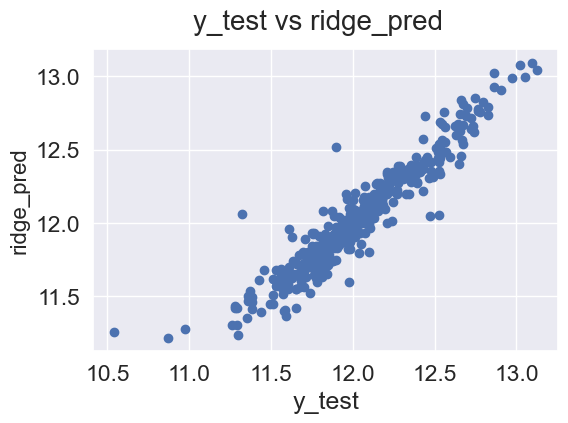

In [401]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

The graph shows that the linear relationship is presented by the model

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


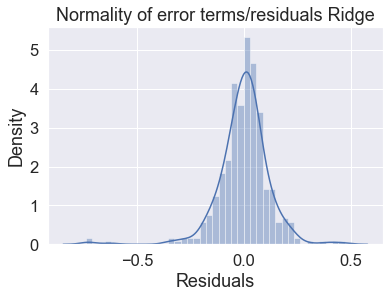

In [402]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Ridge')
plt.xlabel("Residuals")
plt.show()

The residuals are a bit skewed.

In [403]:
lasso_pred = lasso.predict(X_test)

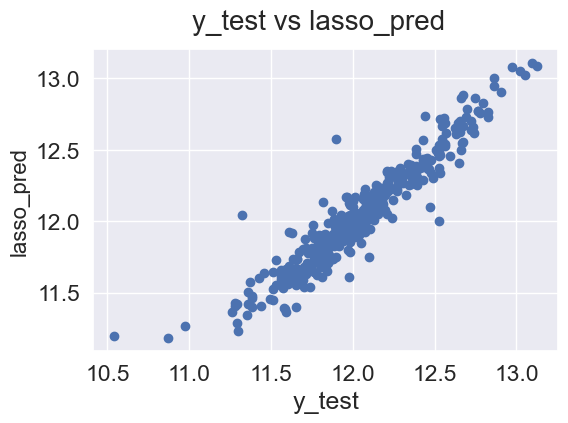

In [404]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

The graph is similar to the Ridge values. There are slightly fewer outliers.

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


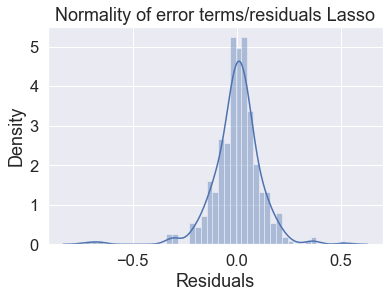

In [405]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

The residuals are also skewed, but less than the Ridge Regression one.

## 5.4 Changes in Coefficients

In [406]:
betas = pd.DataFrame(index=X_train.columns)

In [407]:
betas.rows = X_train.columns

C:\Users\geral\AppData\Local\Temp\ipykernel_3484\4075975573.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [408]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [409]:

betas.head(68)

Linear     Ridge     Lasso
MSSubClass           -4.344628e-02 -0.008881 -0.004150
LotFrontage           1.074150e-02  0.012738  0.011674
LotArea               2.884529e-02  0.026136  0.024796
OverallQual           5.107894e-02  0.056866  0.065629
OverallCond           4.337356e-02  0.035241  0.043846
YearBuilt             4.324282e-02  0.020928  0.043804
YearRemodAdd          9.063795e-03  0.018527  0.012109
MasVnrArea           -6.636650e-03  0.000996 -0.000565
BsmtFinSF1           -7.174701e+10  0.032866  0.028170
BsmtFinSF2           -2.300368e+10  0.002878  0.000000
BsmtUnfSF            -7.339566e+10  0.011679 -0.000000
TotalBsmtSF           6.690324e+10  0.049047  0.048505
2ndFlrSF             -2.935652e-03  0.017521  0.000000
GrLivArea             1.243440e-01  0.074856  0.128692
BsmtFullBath          1.557663e-02  0.014317  0.015003
BsmtHalfBath          2.164447e-03  0.000333  0.000000
FullBath              1.604331e-02  0.023970  0.014771
HalfBath              1.225867e-02  0.016759  0.010764
BedroomAbvGr          1.064695e-03  0.009060  0.000285
KitchenAbvGr         -9.398524e+10  0.000000  0.000000
Fireplaces            6.243542e-03  0.014221  0.006904
GarageCars            4.179762e-02  0.038427  0.039150
WoodDeckSF            5.996034e-03  0.006836  0.004434
OpenPorchSF           2.455693e-03  0.004698  0.001135
EnclosedPorch         4.709185e-03  0.001170  0.002230
ScreenPorch           1.272696e-02  0.011084  0.011274
MoSold                2.387083e-04 -0.000014  0.000000
YrSold               -1.775123e-03 -0.000986 -0.000000
MSZoning_FV           8.318972e-02  0.006997  0.014027
MSZoning_RH           3.522362e-02  0.001505  0.004967
MSZoning_RL           1.630092e-01  0.019009  0.040194
MSZoning_RM           1.335902e-01  0.008665  0.024369
Street_Pave           2.075018e-03  0.008403  0.006583
LotShape_IR2         -1.158237e-03 -0.000437 -0.000000
LotShape_IR3         -1.450539e-03 -0.001744 -0.000798
LotShape_Reg          1.391977e-03 -0.000474 -0.000000
LandContour_HLS       8.533478e-03  0.003723  0.003305
LandContour_Low      -8.445740e-03 -0.009224 -0.008880
LandContour_Lvl       1.152039e-03 -0.001254 -0.000000
Utilities_NoSeWa     -7.526398e-03 -0.004590 -0.002949
LotConfig_CulDSac     5.159378e-03  0.006390  0.004627
LotConfig_FR2        -5.870700e-03 -0.005695 -0.002503
LotConfig_FR3        -2.784729e-04 -0.000905  0.000000
LotConfig_Inside     -1.998901e-03 -0.003678 -0.002185
LandSlope_Mod        -4.095078e-03 -0.000957 -0.000000
LandSlope_Sev        -2.811146e-02 -0.013868 -0.013578
Neighborhood_Blueste -1.506805e-04  0.001174  0.000762
Neighborhood_BrDale  -6.876945e-03 -0.002912 -0.000602
Neighborhood_BrkSide -5.299568e-03  0.003110  0.006533
Neighborhood_ClearCr -2.415538e-03  0.002378  0.001290
Neighborhood_CollgCr -1.177025e-02 -0.000962  0.001578
Neighborhood_Crawfor  1.067162e-02  0.018144  0.020122
Neighborhood_Edwards -2.683449e-02 -0.012537 -0.007120
Neighborhood_Gilbert -1.279068e-02 -0.007546 -0.001572
Neighborhood_IDOTRR  -9.793282e-03 -0.011594 -0.006471
Neighborhood_MeadowV -1.621819e-02 -0.012798 -0.008669
Neighborhood_Mitchel -1.683640e-02 -0.009030 -0.006373
Neighborhood_NAmes   -2.810717e-02 -0.007820 -0.002776
Neighborhood_NPkVill -3.269196e-03  0.001142  0.000976
Neighborhood_NWAmes  -1.516342e-02 -0.002914 -0.000221
Neighborhood_NoRidge -9.105206e-04  0.005409  0.002309
Neighborhood_NridgHt  8.014679e-03  0.016451  0.015932
Neighborhood_OldTown -2.508926e-02 -0.014385 -0.008738
Neighborhood_SWISU   -8.791924e-03 -0.001855 -0.000000
Neighborhood_Sawyer  -1.612282e-02 -0.004018 -0.000261
Neighborhood_SawyerW -8.808136e-03 -0.000715 -0.000000
Neighborhood_Somerst  9.428501e-03  0.015094  0.020754
Neighborhood_StoneBr  1.377487e-02  0.016520  0.015907

In [441]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False)

C:\Users\geral\AppData\Local\Temp\ipykernel_3484\103727110.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


Lasso
GrLivArea              0.128692
OverallQual            0.065629
TotalBsmtSF            0.048505
OverallCond            0.043846
YearBuilt              0.043804
MSZoning_RL            0.040194
GarageCars             0.039150
BsmtFinSF1             0.028170
LotArea                0.024796
MSZoning_RM            0.024369
SaleCondition_Normal   0.022812
Foundation_PConc       0.022351
Neighborhood_Somerst   0.020754
Neighborhood_Crawfor   0.020122
SaleType_New           0.018898
Condition1_Norm        0.018219
Functional_Typ         0.017749
Neighborhood_NridgHt   0.015932
Neighborhood_StoneBr   0.015907
BsmtFullBath           0.015003
FullBath               0.014771
MSZoning_FV            0.014027
Exterior1st_BrkFace    0.012979
YearRemodAdd           0.012109
SaleCondition_Partial  0.011948
CentralAir_Y           0.011701
LotFrontage            0.011674
ScreenPorch            0.011274
PavedDrive_Y           0.011178
HalfBath               0.010764
Functional_Min2        0.008049
Heating_GasW           0.007642
Exterior2nd_VinylSd    0.007546
Exterior2nd_Wd Sdng    0.007376
BsmtExposure_Gd        0.007366
Condition1_PosN        0.007315
BsmtCond_Po            0.007120
SaleType_CWD           0.007009
Fireplaces             0.006904
Heating_Wall           0.006813
Street_Pave            0.006583
Neighborhood_BrkSide   0.006533
Exterior2nd_AsphShn    0.005483
Exterior1st_MetalSd    0.005255
GarageType_CarPort     0.005061
MSZoning_RH            0.004967
SaleCondition_AdjLand  0.004949
LotConfig_CulDSac      0.004627
Neighborhood_Veenker   0.004439
WoodDeckSF             0.004434
Exterior1st_Stucco     0.004286
Foundation_Stone       0.004206
SaleType_ConLI         0.004001
GarageCond_Po          0.003868
BsmtFinType1_GLQ       0.003450
LandContour_HLS        0.003305
HouseStyle_2.5Unf      0.003282
SaleType_Con           0.003235
RoofStyle_Mansard      0.002314
Neighborhood_NoRidge   0.002309
SaleCondition_Family   0.002303
EnclosedPorch          0.002230
BsmtFinType2_GLQ       0.002165
Condition1_RRAn        0.002058
Condition1_RRNn        0.002011
BsmtQual_Fa            0.001755
BsmtFinType2_LwQ       0.001690
SaleType_ConLD         0.001685
Neighborhood_CollgCr   0.001578
Neighborhood_ClearCr   0.001290
Exterior2nd_Brk Cmn    0.001246
BsmtExposure_Mn        0.001233
HouseStyle_SFoyer      0.001221
OpenPorchSF            0.001135
Exterior2nd_CmentBd    0.001072
Neighborhood_NPkVill   0.000976
RoofStyle_Hip          0.000824
GarageCond_Gd          0.000819
Neighborhood_Blueste   0.000762
MasVnrType_BrkFace     0.000679
BldgType_Duplex        0.000645
ExterCond_Po           0.000513
MasVnrType_Stone       0.000479
PavedDrive_P           0.000462
BedroomAbvGr           0.000285
BsmtCond_TA            0.000212
GarageQual_Gd          0.000173
Exterior2nd_HdBoard   -0.000000
Exterior2nd_MetalSd    0.000000
Exterior2nd_Wd Shng   -0.000000
Exterior2nd_Plywood   -0.000000
MasVnrType_None       -0.000000
SaleType_Oth           0.000000
ExterQual_TA           0.000000
Exterior2nd_ImStucc   -0.000000
Exterior2nd_Stone      0.000000
BsmtFinType1_Rec      -0.000000
ExterCond_TA           0.000000
Foundation_CBlock     -0.000000
GarageType_Detchd     -0.000000
GarageQual_TA          0.000000
GarageType_BuiltIn     0.000000
GarageType_Basment     0.000000
GarageType_Attchd      0.000000
Electrical_Mix        -0.000000
GarageCond_TA         -0.000000
Electrical_FuseF       0.000000
Heating_Grav           0.000000
Heating_GasA          -0.000000
BsmtFinType2_Unf       0.000000
BsmtFinType2_Rec      -0.000000
GarageFinish_RFn      -0.000000
Foundation_Slab        0.000000
SaleType_ConLw         0.000000
Functional_Min1        0.000000
Exterior1st_Plywood   -0.000000
BldgType_TwnhsE       -0.000000
Condition2_PosN       -0.000000
BsmtHalfBath           0.000000
RoofStyle_Gable       -0.000000
HouseStyle_SLvl        0.000000
Neighborhood_SawyerW  -0.000000
KitchenAbvGr           0.000000
MoSold                 0.000000
Neighborhood_Timber    0.0

## 5.5 Evaluation of the model

The model shows that there are some variables that are highly relevant to the sales price.
Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
The higher values of positive coeeficients suggest a high sale value.
Some of those features are:

| Feature	| Description|
|-----------|-----------|
| GrLivArea	| Above grade (ground) living area square feet |
| OverallQual	|  Rates the overall material and finish of the house |
| OverallCond | 	Rates the overall condition of the house |
| TotalBsmtSF | 	Total square feet of basement area |
| GarageArea	| Size of garage in square feet|

# 6. Alternate Approach

## 5.1 Recursive feature elimination (RFE)
Feature selection refers to selecting a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Here, the model starts by including all variables, and the model is reduced in complexity by dropping variables one by one, and rebuilding the model after each dropped variable to observe the impact of the dropped variables.

In [410]:
y_train_values=y_train.values.reshape(-1,1)

In [411]:
rfe = RFE(lm,n_features_to_select=30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [412]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 26),
 ('LotFrontage', False, 44),
 ('LotArea', False, 7),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 65),
 ('MasVnrArea', False, 84),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 161),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('BsmtHalfBath', False, 156),
 ('FullBath', False, 39),
 ('HalfBath', False, 76),
 ('BedroomAbvGr', False, 175),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 90),
 ('GarageCars', False, 2),
 ('WoodDeckSF', False, 110),
 ('OpenPorchSF', False, 151),
 ('EnclosedPorch', False, 134),
 ('ScreenPorch', False, 40),
 ('MoSold', False, 184),
 ('YrSold', False, 164),
 ('MSZoning_FV', False, 5),
 ('MSZoning_RH', False, 12),
 ('MSZoning_RL', False, 4),
 ('MSZoning_RM', False, 6),
 ('Street_Pave', False, 152),
 ('LotShape_IR2', False, 173),
 ('LotShape_IR3', False, 168),
 ('LotShape_Reg', False,

In the list above, it is noticable that all columns where RFE support is true have equal scores of 1. This means that they could be considered useful features for the model. The usefulness may change throughout the model building progress. This is because RFE aims to remove the worst performing feature. 

In [413]:
# show supported features
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'Condition2_PosN', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior1st_Stone', 'Exterior2nd_CBlock', 'Exterior2nd_Stone', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA'], dtype='object')

These are the columns that will be used in establishing the model.

In [414]:
# columns were rfe is false
colfls=X_train.columns[~rfe.support_]
colfls

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=186)

These columns will not be considered.

In [415]:
#Check the shape of train and test
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]
print(X_train_rfe.shape)
print(X_test_rfe.shape)
print(y_train.shape)
print(y_test.shape)

(949, 30)
(407, 30)
(949,)
(407,)


In [416]:
y_train=y_train.values.reshape(-1,1)

In [417]:
y_train.shape

(949, 1)

In [418]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe, has_constant='add')

In [419]:
# running the model
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     363.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:00:29   Log-Likelihood:                 564.48
No. Observations:                 949   AIC:                            -1087.
Df Residuals:                     928   BIC:                            -985.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.9817      0.004   2734.272      0.000      11.973      11.990
OverallQual            0.1117      0.007     15.141      0.000       0.097       0.126
OverallCond            0.0555      0.005     11.565      0.000       0.046       0.065
YearBuilt              0.1089      0.006     17.026      0.000       0.096       0.121
BsmtFinSF1             0.0534      0.003     16.576      0.000       0.047       0.060
BsmtFinSF2             0.0004      0.005      0.087      0.931      -0.009       0.010
BsmtUnfSF              0.0088      0.003      2.708      0.007       0.002       0.015
TotalBsmtSF            0.0671      0.004     16.375      0.000       0.059       0.075
GrLivArea              0.1690      0.006     29.171      0.000       0.158       0.180
KitchenAbvGr        2.631e-16   3.96e-18     66.364      0.000    2.55e-16    2.71e-16
Condition2_PosN       -0.3255      0.000  -2734.272      0.000      -0.326      -0.325
RoofStyle_Gable        0.0095      0.002      3.924      0.000       0.005       0.014
RoofStyle_Gambrel     -0.0048      0.004     -1.173      0.241      -0.013       0.003
RoofStyle_Hip          0.0137      0.003      5.215      0.000       0.009       0.019
RoofStyle_Mansard      0.0070      0.005      1.555      0.120      -0.002       0.016
RoofStyle_Shed        -0.3255      0.000  -2734.272      0.000      -0.326      -0.325
RoofMatl_Metal        -0.3255      0.000  -2734.272      0.000      -0.326      -0.325
RoofMatl_Tar&Grv      -0.0070      0.005     -1.328      0.185      -0.017       0.003
RoofMatl_WdShngl      -0.4605      0.000  -2734.272      0.000      -0.461      -0.460
Exterior1st_CBlock    -0.0003      0.002     -0.165      0.869      -0.004       0.003
Exterior1st_Stone      0.0043      0.003      1.658      0.098      -0.001       0.009
Exterior2nd_CBlock    -0.0003      0.002     -0.165      0.869      -0.004       0.003
Exterior2nd_Stone      0.0043      0.003      1.658      0.098      -0.001       0.009
GarageQual_Fa          0.0026      0.011      0.232      0.817      -0.020       0.025
GarageQual_Gd          0.0030      0.007      0.430      0.667      -0.011       0.017
GarageQual_Po         -0.0079      0.007     -1.184      0.237      -0.021       0.005
GarageQual_TA          0.0012      0.013      0.097      0.923      -0.024       0.026
GarageCond_Fa         -0.0002      0.012     -0.013      0.990      -0.023       0.023
GarageCond_Gd          0.0021      0.008      0.277      0.782      -0.013       0.017
GarageCond_Po          0.0083      0.009      0.905      0.366      -0.010       0.026
GarageCond_TA       2.542e-05      0.014      0.002      0.999      -0.027       0.027
==============================================================================
Omnibus:                      155.831   Durbin

There is a substantial amount of features that have very high p-values. It is noticeable that this is especially the case for features that address the same areas of the house. Here, it can be observed that the p value for the features addressing the garage are all very high, with some close to 1.

In [420]:

#Drop the constant
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

## 6.2 Checking VIF and rebuilding model
The Variance Inflation Factor or VIF, provides a basic idea about how much the feature variables are correlated with each other. It is an important parameter, and high values should be dropped.

In [421]:

# calculate the VIF scores
# function that creates a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_VIF_table(X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

get_VIF_table(X_train_rfe)

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Features        VIF
29       GarageCond_TA        inf
12       RoofStyle_Hip        inf
20  Exterior2nd_CBlock        inf
19   Exterior1st_Stone        inf
18  Exterior1st_CBlock        inf
23       GarageQual_Gd        inf
16    RoofMatl_Tar&Grv        inf
24       GarageQual_Po        inf
25       GarageQual_TA        inf
13   RoofStyle_Mansard        inf
11   RoofStyle_Gambrel        inf
22       GarageQual_Fa        inf
10     RoofStyle_Gable        inf
26       GarageCond_Fa        inf
27       GarageCond_Gd        inf
6          TotalBsmtSF        inf
5            BsmtUnfSF        inf
4           BsmtFinSF2        inf
28       GarageCond_Po        inf
21   Exterior2nd_Stone        inf
3           BsmtFinSF1  171102.46
0          OverallQual       2.83
2            YearBuilt       2.20
7            GrLivArea       1.76
1          OverallCond       1.28
17    RoofMatl_WdShngl       0.00
14      RoofStyle_Shed       0.00
9      Condition2_PosN       0.00
15      RoofMatl_Metal       0.00
8         KitchenAbvGr        NaN

It can be observed that there are many features with a very, very high VIF value. Looking at the list of features, this seems to not be surprising, because each area of the house is described with multiple variables: despite dropping certain variables earlier, there are still 6 left that all describe the garage. These did not have a strong correlation apparent in the heatmap created in the EDA phase.
Here, it becomes apparent why RFE set to a low value, such as selecting only 10 features will not be appropriate for the given data set. 

In [422]:
lm=LinearRegression()

lm.fit(X_train_rfe,y_train)

y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

## 6.3 Ridge Regression with RFE

In this section, I applied ridge regression to the features selected through the use of RFE.

In [423]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [424]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 20}
-0.09879858564003219


In [425]:
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([[ 1.13067243e-01,  5.31103909e-02,  1.05610100e-01,
         5.31512509e-02,  3.03774797e-04,  9.20038662e-03,
         6.71970413e-02,  1.65121387e-01,  0.00000000e+00,
        -4.24350863e-31, -1.19147231e-03, -7.11093898e-03,
         3.53847383e-03,  5.39011760e-03,  0.00000000e+00,
         0.00000000e+00, -8.66930374e-03, -1.69740345e-30,
        -3.48038510e-04,  4.36793728e-03, -3.48038510e-04,
         4.36793728e-03,  1.69898541e-03,  3.07890643e-03,
        -7.73041774e-03,  8.37935677e-04, -8.27846398e-04,
         2.02079551e-03,  7.17713549e-03, -2.08804451e-04]])

In [426]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)



0.8865536841704261
0.8625065942144287


The training accuracy is lower than what was generated before. However, the gap between training and testing data is lower. Depending on the business situation, this may be a better model to use.

# 7. Subjective Questions
In this section, coding to support the subjective questions is done

Question 1: What happens if you double the ideal alpha value?

In [427]:
alpha = 200
ridgeDouble = Ridge(alpha=alpha)
ridgeDouble.fit(X_train, y_train)


Ridge(alpha=200)

In [428]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeDouble.predict(X_train)
y_pred_test = ridgeDouble.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)



0.9443069303256956
0.9036142501831415


Doubling the alpha value has decreased the training score slightly and increased the test score slightly, leaving a smaller gap between them

### Double Ridge with RFE

In [429]:
alpha = 40
ridgeRFE = Ridge(alpha=alpha)
ridgeRFE.fit(X_train_rfe, y_train)

Ridge(alpha=40)

In [430]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeRFE.predict(X_train_rfe)
y_pred_test = ridgeRFE.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)


0.8861967592615847
0.8626699608713775


### Lasso Double value

In [431]:
alpha =0.002

lassoDouble = Lasso(alpha=alpha)
        
lassoDouble.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [432]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassoDouble.predict(X_train)
y_pred_test = lassoDouble.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9460454041698761
0.9048445046393828
271891.3517026733
5.429384264021211
0.008484170327096448
0.013340010476710592


The training score has decreased slightly, and the testing score has increased slightly, leading to a smaller gap between them. 

Question 3: Important predictor variables

In [433]:
#important predictor variables
betas1 = pd.DataFrame(index=X_train.columns)
betas1.rows = X_train.columns
betas1['Lasso new'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas1.sort_values(by=['Lasso new'], ascending=False)

C:\Users\geral\AppData\Local\Temp\ipykernel_3484\3959009970.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas1.rows = X_train.columns


Lasso new
GrLivArea               0.128692
OverallQual             0.065629
TotalBsmtSF             0.048505
OverallCond             0.043846
YearBuilt               0.043804
MSZoning_RL             0.040194
GarageCars              0.039150
BsmtFinSF1              0.028170
LotArea                 0.024796
MSZoning_RM             0.024369
SaleCondition_Normal    0.022812
Foundation_PConc        0.022351
Neighborhood_Somerst    0.020754
Neighborhood_Crawfor    0.020122
SaleType_New            0.018898
Condition1_Norm         0.018219
Functional_Typ          0.017749
Neighborhood_NridgHt    0.015932
Neighborhood_StoneBr    0.015907
BsmtFullBath            0.015003
FullBath                0.014771
MSZoning_FV             0.014027
Exterior1st_BrkFace     0.012979
YearRemodAdd            0.012109
SaleCondition_Partial   0.011948
CentralAir_Y            0.011701
LotFrontage             0.011674
ScreenPorch             0.011274
PavedDrive_Y            0.011178
HalfBath                0.010764
Functional_Min2         0.008049
Heating_GasW            0.007642
Exterior2nd_VinylSd     0.007546
Exterior2nd_Wd Sdng     0.007376
BsmtExposure_Gd         0.007366
Condition1_PosN         0.007315
BsmtCond_Po             0.007120
SaleType_CWD            0.007009
Fireplaces              0.006904
Heating_Wall            0.006813
Street_Pave             0.006583
Neighborhood_BrkSide    0.006533
Exterior2nd_AsphShn     0.005483
Exterior1st_MetalSd     0.005255
GarageType_CarPort      0.005061
MSZoning_RH             0.004967
SaleCondition_AdjLand   0.004949
LotConfig_CulDSac       0.004627
Neighborhood_Veenker    0.004439
WoodDeckSF              0.004434
Exterior1st_Stucco      0.004286
Foundation_Stone        0.004206
SaleType_ConLI          0.004001
GarageCond_Po           0.003868
BsmtFinType1_GLQ        0.003450
LandContour_HLS         0.003305
HouseStyle_2.5Unf       0.003282
SaleType_Con            0.003235
RoofStyle_Mansard       0.002314
Neighborhood_NoRidge    0.002309
SaleCondition_Family    0.002303
EnclosedPorch           0.002230
BsmtFinType2_GLQ        0.002165
Condition1_RRAn         0.002058
Condition1_RRNn         0.002011
BsmtQual_Fa             0.001755
BsmtFinType2_LwQ        0.001690
SaleType_ConLD          0.001685
Neighborhood_CollgCr    0.001578
Neighborhood_ClearCr    0.001290
Exterior2nd_Brk Cmn     0.001246
BsmtExposure_Mn         0.001233
HouseStyle_SFoyer       0.001221
OpenPorchSF             0.001135
Exterior2nd_CmentBd     0.001072
Neighborhood_NPkVill    0.000976
RoofStyle_Hip           0.000824
GarageCond_Gd           0.000819
Neighborhood_Blueste    0.000762
MasVnrType_BrkFace      0.000679
BldgType_Duplex         0.000645
ExterCond_Po            0.000513
MasVnrType_Stone        0.000479
PavedDrive_P            0.000462
BedroomAbvGr            0.000285
BsmtCond_TA             0.000212
GarageQual_Gd           0.000173
Exterior2nd_HdBoard    -0.000000
Exterior2nd_MetalSd     0.000000
Exterior2nd_Wd Shng    -0.000000
Exterior2nd_Plywood    -0.000000
MasVnrType_None        -0.000000
SaleType_Oth            0.000000
ExterQual_TA            0.000000
Exterior2nd_ImStucc    -0.000000
Exterior2nd_Stone       0.000000
BsmtFinType1_Rec       -0.000000
ExterCond_TA            0.000000
Foundation_CBlock      -0.000000
GarageType_Detchd      -0.000000
GarageQual_TA           0.000000
GarageType_BuiltIn      0.000000
GarageType_Basment      0.000000
GarageType_Attchd       0.000000
Electrical_Mix         -0.000000
GarageCond_TA          -0.000000
Electrical_FuseF        0.000000
Heating_Grav            0.000000
Heating_GasA           -0.000000
BsmtFinType2_Unf        0.000000
BsmtFinType2_Rec       -0.000000
GarageFinish_RFn       -0.000000
Foundation_Slab         0.000000
SaleType_ConLw          0.000000
Functional_Min1         0.000000
Exterior1st_Plywood    -0.000000
BldgType_TwnhsE        -0.000000
Condition2_PosN        -0.000000
BsmtHalfBath            0.000000
RoofStyle_Gable        -0.000000
HouseStyle_SLvl         0.0000

GrLivArea	0.128692
OverallQual	0.065629
TotalBsmtSF	0.048505
OverallCond	0.043846
YearBuilt	0.043804

'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt' are the most important predictor variables in the first model.


In [434]:
X_train2 = X_train.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt'],axis=1)
X_test2 = X_test.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt'],axis=1)

In [435]:
alpha =0.001
lassonew = Lasso(alpha=alpha)
lassonew.fit(X_train2, y_train) 

Lasso(alpha=0.001)

In [436]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lassonew.predict(X_train2)
y_pred_test = lassonew.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9349632043031669
0.8715058846873389
270587.31149252254
7.331619945374472
0.010226807257676352
0.018013808219593298


Both train and test score have decreased a bit. However, the RSS value has shot up considerably

In [437]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso new'] = lassonew.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso new'], ascending=False)

C:\Users\geral\AppData\Local\Temp\ipykernel_3484\2371996703.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


Lasso new
BsmtFinSF1              0.143149
BsmtUnfSF               0.119984
MSZoning_RL             0.086269
2ndFlrSF                0.085585
MSZoning_RM             0.072373
GarageCars              0.049946
YearRemodAdd            0.040509
MSZoning_FV             0.038955
BsmtFinSF2              0.036125
FullBath                0.032592
LotArea                 0.028782
SaleCondition_Partial   0.027063
SaleCondition_Normal    0.024478
Neighborhood_Crawfor    0.023553
Fireplaces              0.021833
Neighborhood_Somerst    0.021796
Neighborhood_StoneBr    0.020282
Neighborhood_NridgHt    0.019289
Exterior1st_BrkFace     0.019217
PavedDrive_Y            0.017722
HalfBath                0.017243
CentralAir_Y            0.016839
Foundation_PConc        0.016205
MSZoning_RH             0.015675
Condition1_Norm         0.014550
Exterior2nd_Wd Sdng     0.014368
Functional_Typ          0.013126
BedroomAbvGr            0.012600
Exterior1st_Stucco      0.012464
LotFrontage             0.012400
BsmtFullBath            0.011381
ScreenPorch             0.010617
BsmtExposure_Gd         0.010201
LotConfig_CulDSac       0.009963
BsmtFinType1_GLQ        0.009319
MasVnrType_BrkFace      0.009044
Heating_Wall            0.009001
Condition1_PosN         0.008975
WoodDeckSF              0.007653
Foundation_Stone        0.007296
BsmtCond_Gd             0.007237
SaleType_CWD            0.007185
Neighborhood_NoRidge    0.006945
Street_Pave             0.006711
GarageType_CarPort      0.006432
Exterior2nd_VinylSd     0.006354
Heating_GasW            0.006148
BsmtCond_TA             0.005842
Exterior2nd_CmentBd     0.005456
Neighborhood_Veenker    0.005384
LandContour_HLS         0.005350
BsmtCond_Po             0.005053
HouseStyle_2.5Unf       0.005052
GarageQual_Gd           0.005003
Exterior1st_Stone       0.004934
Functional_Min2         0.004879
SaleType_Con            0.004823
MasVnrType_Stone        0.004806
Exterior2nd_MetalSd     0.004786
RoofMatl_WdShake        0.004065
BsmtExposure_Mn         0.003608
OpenPorchSF             0.003451
GarageCond_Po           0.003448
HouseStyle_SLvl         0.003395
Exterior2nd_AsphShn     0.003316
PavedDrive_P            0.003159
Condition1_RRNn         0.003095
Neighborhood_NPkVill    0.002401
Neighborhood_NWAmes     0.002121
GarageType_Basment      0.001803
SaleType_ConLD          0.001770
BsmtFinType2_GLQ        0.001745
BsmtFinType2_LwQ        0.001699
SaleCondition_AdjLand   0.001505
Neighborhood_BrkSide    0.001046
Exterior1st_MetalSd     0.001014
GarageCond_Gd           0.000967
Foundation_Slab         0.000964
Functional_Min1         0.000959
Heating_OthW            0.000944
GarageType_BuiltIn      0.000611
Neighborhood_SWISU      0.000424
Exterior1st_ImStucc     0.000344
MoSold                  0.000320
BsmtHalfBath            0.000275
YrSold                  0.000269
Condition1_RRAn         0.000248
Condition1_PosA         0.000108
RoofStyle_Mansard       0.000102
Exterior2nd_Stone       0.000069
Exterior2nd_HdBoard    -0.000000
Exterior2nd_ImStucc     0.000000
Exterior2nd_CBlock     -0.000000
KitchenAbvGr            0.000000
Exterior2nd_Wd Shng    -0.000000
MasVnrType_None        -0.000000
Electrical_Mix          0.000000
Electrical_FuseF       -0.000000
ExterQual_Gd           -0.000000
ExterCond_Gd            0.000000
Foundation_CBlock       0.000000
HeatingQC_Po           -0.000000
BsmtQual_Fa            -0.000000
GarageQual_TA           0.000000
Heating_GasA           -0.000000
BsmtFinType2_Unf       -0.000000
BsmtFinType2_Rec        0.000000
Exterior2nd_Brk Cmn     0.000000
GarageType_Attchd       0.000000
SaleType_New            0.000000
Condition1_RRNe        -0.000000
Condition2_PosN        -0.000000
BldgType_2fmCon        -0.000000
BldgType_Duplex         0.000000
BldgType_TwnhsE        -0.000000
Condition1_Feedr       -0.000000
GarageCond_TA          -0.000000
HouseStyle_1.5Unf      -0.000000
Neighborhood_SawyerW    0.000000
Neighborhood_Blueste    0.000000
Neighborhood_ClearCr   -0.0000

New top predictor variables
GrLivArea	0.146928
MSZoning_RL	0.083526
MSZoning_RM	0.065606
TotalBsmtSF	0.056324
GarageCars	0.043311

###  Ridge with double alpha

In [438]:
alpha =200
ridgenewdb = Ridge(alpha=alpha)
ridgenewdb.fit(X_train2, y_train) 

Ridge(alpha=200)

In [447]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgenewdb.predict(X_train2)
y_pred_test = ridgenewdb.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)



0.9181493993898664
0.8752988660255734


### Lasso with double alpha value on new model with removed predictors

In [439]:
alpha =0.002
lassonewdb = Lasso(alpha=alpha)
lassonewdb.fit(X_train2, y_train) 

Lasso(alpha=0.002)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lassonewdb.predict(X_train2)
y_pred_test = lassonewdb.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9331077363096845
0.8865816135948931
269651.4026319776
6.471428686959769
0.010518573070226318
0.015900316184176335


In [ ]:
#important predictor variables
betasdb = pd.DataFrame(index=X_train2.columns)
betasdb.rows = X_train.columns
betasdb['Lasso new double alpha'] = lassonewdb.coef_
pd.set_option('display.max_rows', None)
betasdb.sort_values(by=['Lasso new double alpha'], ascending=False)

C:\Users\geral\AppData\Local\Temp\ipykernel_3484\814548369.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betasdb.rows = X_train.columns


Lasso new double alpha
GrLivArea                            0.152414
TotalBsmtSF                          0.059183
GarageCars                           0.043507
YearRemodAdd                         0.031122
SaleCondition_Partial                0.030626
YearBuilt                            0.027846
Functional_Typ                       0.026365
SaleCondition_Normal                 0.025850
BsmtFinSF1                           0.024885
Neighborhood_Somerst                 0.022304
Neighborhood_Crawfor                 0.022098
Neighborhood_NridgHt                 0.021295
CentralAir_Y                         0.019190
Neighborhood_StoneBr                 0.016345
Fireplaces                           0.013087
Condition1_Norm                      0.013046
MSZoning_RL                          0.012997
Exterior1st_BrkFace                  0.012788
ScreenPorch                          0.011928
BsmtFullBath                         0.011448
PavedDrive_Y                         0.009823
BsmtExposure_Gd                      0.009108
FullBath                             0.008420
SaleType_CWD                         0.008420
Foundation_PConc                     0.008351
BsmtFinType1_GLQ                     0.006517
Heating_GasW                         0.006246
Exterior1st_Stucco                   0.005576
LandContour_HLS                      0.005532
LotConfig_CulDSac                    0.005393
Neighborhood_Veenker                 0.005351
WoodDeckSF                           0.005259
HalfBath                             0.005088
Neighborhood_BrkSide                 0.004349
Heating_Wall                         0.004045
RoofStyle_Hip                        0.003862
Neighborhood_NWAmes                  0.003515
Functional_Min2                      0.003469
OpenPorchSF                          0.003381
Exterior2nd_AsphShn                  0.003286
GarageType_CarPort                   0.003273
HouseStyle_2.5Unf                    0.003143
Street_Pave                          0.003025
SaleCondition_AdjLand                0.003010
Exterior2nd_CmentBd                  0.002769
GarageQual_Gd                        0.002728
Exterior2nd_Wd Sdng                  0.002212
SaleType_New                         0.002150
PavedDrive_P                         0.002095
BsmtCond_Po                          0.002088
Neighborhood_NoRidge                 0.002029
MasVnrType_Stone                     0.002012
LotShape_IR2                         0.001962
SaleType_Con                         0.001793
BsmtFinType2_LwQ                     0.001791
Condition1_RRNn                      0.001715
GarageType_Attchd                    0.001394
Foundation_Stone                     0.001333
MSZoning_RM                          0.000976
Condition1_PosN                      0.000818
BsmtFinType2_GLQ                     0.000719
Condition1_RRAn                      0.000707
YrSold                               0.000705
Exterior2nd_VinylSd                  0.000482
Neighborhood_NPkVill                 0.000326
BsmtHalfBath                         0.000306
BsmtExposure_Mn                      0.000227
SaleType_ConLw                       0.000192
Exterior2nd_Stone                    0.000154
Exterior1st_Stone                    0.000093
Exterior1st_ImStucc                  0.000024
ExterQual_Gd                        -0.000000
GarageCond_TA                        0.000000
MasVnrType_None                     -0.000000
MasVnrType_BrkFace                   0.000000
HeatingQC_Po                         0.000000
2ndFlrSF                             0.000000
Exterior2nd_Stucco                  -0.000000
SaleType_ConLI                       0.000000
ExterCond_Gd                        -0.000000
Exterior2nd_MetalSd                  0.000000
Exterior2nd_ImStucc                 -0.000000
Exterior2nd_HdBoard                 -0.000000
Electrical_Mix                       0.000000
Exterior2nd_CBlock                  -0.000000
Exterior2nd_Brk Cmn                 -0.000000
GarageCond_Po        

### New Lasso model with RFE

In [ ]:
X_train3 = X_train.drop(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2'],axis=1)
X_test3 = X_test.drop(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2'],axis=1)

In [ ]:
alpha =0.001
lassonew1 = Lasso(alpha=alpha)
lassonew1.fit(X_train3, y_train) 

Lasso(alpha=0.001)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lassonew1.predict(X_train3)
y_pred_test = lassonew1.predict(X_test3)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9416149404066122
0.8802825371425915
272105.88233395555
6.830841524215059
0.009180845162988241
0.016783394408390807


In [ ]:
#important predictor variables
betas3 = pd.DataFrame(index=X_train3.columns)
betas3.rows = X_train_rfe.columns
betas3['Lasso new RFE'] = lassonew1.coef_
pd.set_option('display.max_rows', None)
betas3.sort_values(by=['Lasso new RFE'], ascending=False)

C:\Users\geral\AppData\Local\Temp\ipykernel_3484\606246069.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas3.rows = X_train_rfe.columns


Lasso new RFE
GrLivArea                   0.136432
MSZoning_RL                 0.083509
TotalBsmtSF                 0.073250
MSZoning_RM                 0.069320
GarageCars                  0.041585
MSZoning_FV                 0.038098
YearRemodAdd                0.032816
SaleCondition_Partial       0.030260
Functional_Typ              0.028671
SaleCondition_Normal        0.027014
Neighborhood_Somerst        0.024146
Neighborhood_NridgHt        0.020556
Neighborhood_StoneBr        0.018779
LotArea                     0.017940
Neighborhood_Crawfor        0.017837
Condition1_Norm             0.017678
CentralAir_Y                0.016801
PavedDrive_Y                0.016279
Foundation_PConc            0.015502
MSZoning_RH                 0.014841
BsmtFullBath                0.014154
Exterior2nd_Wd Sdng         0.014103
Exterior1st_BrkFace         0.013705
FullBath                    0.013077
ScreenPorch                 0.011900
LotFrontage                 0.011238
Fireplaces                  0.011045
Exterior1st_Stucco          0.009314
BsmtExposure_Gd             0.009047
SaleType_CWD                0.008516
HalfBath                    0.008430
Heating_Wall                0.008134
LotConfig_CulDSac           0.008100
Heating_GasW                0.006702
Functional_Min2             0.006677
WoodDeckSF                  0.006295
Foundation_Stone            0.006122
Neighborhood_Veenker        0.005775
MasVnrType_Stone            0.005764
Condition1_PosN             0.005495
RoofStyle_Hip               0.005409
MasVnrType_BrkFace          0.005371
BsmtCond_TA                 0.005330
HouseStyle_2.5Unf           0.005264
LandContour_HLS             0.005197
Exterior2nd_VinylSd         0.004587
BsmtFinType1_GLQ            0.004565
BsmtCond_Po                 0.004537
GarageType_CarPort          0.004374
Exterior2nd_AsphShn         0.004167
Street_Pave                 0.004042
GarageQual_Gd               0.004016
SaleType_Con                0.003865
SaleCondition_AdjLand       0.003853
Exterior2nd_CmentBd         0.003698
BsmtCond_Gd                 0.003515
Neighborhood_NoRidge        0.003315
PavedDrive_P                0.003094
Neighborhood_NPkVill        0.002781
Condition1_RRAn             0.002629
BsmtHalfBath                0.002513
Condition1_RRNn             0.002302
Neighborhood_NWAmes         0.002301
OpenPorchSF                 0.002290
BsmtExposure_Mn             0.002097
GarageType_Attchd           0.001914
SaleCondition_Family        0.001779
Exterior2nd_MetalSd         0.001744
MoSold                      0.001455
Functional_Min1             0.001405
SaleType_New                0.001329
HouseStyle_SFoyer           0.001272
YrSold                      0.001157
Exterior1st_ImStucc         0.000981
BsmtFinType2_LwQ            0.000897
Exterior1st_MetalSd         0.000599
Neighborhood_CollgCr        0.000470
SaleType_ConLD              0.000470
HouseStyle_SLvl             0.000186
SaleType_ConLI              0.000075
GarageType_BuiltIn          0.000000
MasVnrType_None            -0.000000
SaleType_Oth               -0.000000
BedroomAbvGr                0.000000
ExterCond_TA               -0.000000
Exterior2nd_ImStucc         0.000000
Exterior2nd_HdBoard        -0.000000
Exterior2nd_Brk Cmn         0.000000
ExterCond_Gd               -0.000000
GarageCond_Po               0.000000
SaleType_ConLw              0.000000
Foundation_CBlock           0.000000
BsmtQual_Fa                -0.000000
GarageCond_TA              -0.000000
GarageType_Basment          0.000000
GarageCond_Gd               0.000000
BsmtFinType2_GLQ            0.000000
BsmtFinType2_Unf            0.000000
Heating_GasA                0.000000
Exterior1st_WdShing        -0.000000
HeatingQC_Po               -0.000000
GarageQual_TA               0.000000
Electrical_FuseF           -0.000000
Electrical_Mix              0.000000
2ndFlrSF                   -0.000000
LotShape_IR2                0.000000
Exterior2nd_Stone           0.000000
HouseStyle_1.5Unf          

Results are very similar to the previous model built on all features, with lasso autoselecting. Here, the train and test scores are very, very slightly higher.